In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import datetime

import ConstructPortfolio as cp #this will allow us to modularize the code!
#using "ConstructPortfolio.py" that is stored in the same directory! 
#(not using "ConstructPortfolio.ipynb")

/Users/bardiafarajnejad/Desktop/1st Half MFE/AFP/Final Delivery/MFE Group 16 AFP Code


# Spread (between buy-sell) on all events has gone down --> this signal is less informative than the one at 1-2 year ahead

# The spread for CF actually is negative (sell portfolio does better than buy)


In [2]:
# Trading on EPS high moves is super informative... buy days do much better than sell days

# Trading on EPS low moves is also informative (but less so than EPS high moves)... buy days do much better than sell days again

##########################################

# Trading on Sales high/low moves is also informative... buy days do much better than sell days


##########################################

# Trading on CF high/low moves is NOT AS informative... buy days still do  better than sell days, but the spread is not as large anymore



In [3]:
#### Please run the line below once in order to get "data_with_rets.pkl" from "afp_data_sample_1995_onward_v2.csv"
#cp.get_data(flag=True)

data = pd.read_pickle('data_with_rets.pkl')
data.columns.values

array(['tradedate', 'osid', 'symbol', 'coname', 'sector_group', 'max_dt',
       'previoustradedate', 'tickssinceipo', 'alpha', 'stdev_alpha',
       'pricehigh', 'pricelow', 'priceclose', 'priceopen', 'splitfactor',
       'cumsplitfactor', 'volume', 'unadjustedpriceclose', 'pricepctchgd',
       'avgvol50d', 'avgdollarvol50d', 'growthscore', 'growthrank',
       'lastupdatetime', 'epsq1', 'epsq2', 'epsq3', 'epsq4', 'epsq5',
       'epsq6', 'epsq7', 'epsq8', 'epshighq1', 'epshighq2', 'epshighq3',
       'epshighq4', 'epshighq5', 'epshighq6', 'epshighq7', 'epshighq8',
       'epslowq1', 'epslowq2', 'epslowq3', 'epslowq4', 'epslowq5',
       'epslowq6', 'epslowq7', 'epslowq8', 'salesq1', 'salesq2',
       'salesq3', 'salesq4', 'salesq5', 'salesq6', 'salesq7', 'salesq8',
       'saleshighq1', 'saleshighq2', 'saleshighq3', 'saleshighq4',
       'saleshighq5', 'saleshighq6', 'saleshighq7', 'saleshighq8',
       'saleslowq1', 'saleslowq2', 'saleslowq3', 'saleslowq4',
       'saleslowq5', 's

# Analyst Estimate = epshigha1

### Now, let's trade on increases in epshigha1 targets
### the times when 'epshigha1' changes
###### Buy when positive change, so when df['epshigha1'].diff(1) > 0
###### Sell when negative change, so when df['epshigha1'].diff(1) < 0
### with 1 day, 1 week, 2 weeks, 3 weeks, and 4 weeks holding period 
### (AHEAD, not backward... so our ret, ret5d, 10d, 15d, and 20d needs to be forward)
### Thus, we will use ret5d_'lag' !!

# Set buy_tomorrow>0 when df['epshigha1'].diff(1) > 0
# Set Sell_tomorrow>0 when df['epshigha1'].diff(1) < 0


In [4]:
data = data.sort_values(['osid', 'tradedate']).reset_index(drop=True).copy()

data = data[data['epshigha3'].notna()].reset_index(drop=True).copy()


data['buy_tomorrow'] = np.where(data['epshigha3'].diff(1) > 0, 1, 0)
data['sell_tomorrow'] = np.where(data['epshigha3'].diff(1) < 0, 1, 0)


print('Total number of Buys: ',np.count_nonzero(data['buy_tomorrow']))
print('Total number of Sells: ',np.count_nonzero(data['sell_tomorrow']))

print('Unique buy_tomorrow values: ',np.unique(data['buy_tomorrow'])) #there are only 0 or 1 values in 'buy_tomorrow'
print('Unique sell_tomorrow values: ',np.unique(data['sell_tomorrow'])) #there are only 0 or 1 values in 'sell_tomorrow'


Total number of Buys:  18831
Total number of Sells:  17913
Unique buy_tomorrow values:  [0 1]
Unique sell_tomorrow values:  [0 1]


In [5]:
data = cp.trade_on_valid_lags_only(data)


There are  198  problems for buying

There are  122  problems for selling
Total number of Buys:  18633
Total number of Sells:  17791


# Now we can trade!
### Holding period of 1 week, 2 weeks, 3 weeks, and 4 weeks with equal weighted portfolios!

# First, create daily equal weighted portfolio weights and returns (NOT AT THE WEEKLY frequency because that will mess up the implementation of the portfolio!). Problem is:

##### Think (part 1): 1st signal on Monday- want to buy on Tuesday and hold for 1 week in an equal weighted portfolio
##### Think (part 2): 2nd signal on Thursday- want to buy on Friday and hold for 1 week in an equal weighted portfolio
##### Think (part 3): Will have overlapping portfolio between 1st and 2nd signal on Friday and on Monday

## Then, for 1 week, 2 week, 3 week, and 4 week holding periods, we must do the following:
##### extend "buy_tomorrow" and "sell_tomorrow" forward for 4 more trading days

In [6]:
data_smaller,data_smaller5,data_smaller10,data_smaller15,data_smaller20 = cp.pull_signal_forward(data)

data_smaller20 = cp.trade_on_valid_lags_only(data_smaller20)
data_smaller15 = cp.trade_on_valid_lags_only(data_smaller15)
data_smaller10 = cp.trade_on_valid_lags_only(data_smaller10)
data_smaller5 = cp.trade_on_valid_lags_only(data_smaller5)
data_smaller = cp.trade_on_valid_lags_only(data_smaller)


There are  403  problems for buying

There are  359  problems for selling
Total number of Buys:  203846
Total number of Sells:  165803

There are  345  problems for buying

There are  299  problems for selling
Total number of Buys:  161988
Total number of Sells:  132219

There are  264  problems for buying

There are  229  problems for selling
Total number of Buys:  116951
Total number of Sells:  96450

There are  168  problems for buying

There are  150  problems for selling
Total number of Buys:  67942
Total number of Sells:  57672

There are  2  problems for buying

There are  0  problems for selling
Total number of Buys:  18615
Total number of Sells:  17785


# First, do 1 day holding period: data_smaller
# Next, do 5 day holding period: data_smaller5
# Next, do 10 day holding period: data_smaller10
# Next, do 15 day holding period: data_smaller15
# Next, do 20 day holding period: data_smaller20



There are  3  returns that dont match using .mean() vs. using equal weights

There are  0  alphas that dont match using .mean() vs. using equal weights

There are  1  returns that dont match using .mean() vs. using equal weights

There are  0  alphas that dont match using .mean() vs. using equal weights

All weights sum to one for Buys

All weights sum to one for Sells
Regression for Buy Portfolio
                            OLS Regression Results                            
Dep. Variable:           ew_return-RF   R-squared:                       0.005
Model:                            OLS   Adj. R-squared:                  0.003
Method:                 Least Squares   F-statistic:                     3.126
Date:                Sat, 04 Dec 2021   Prob (F-statistic):            0.00466
Time:                        20:27:45   Log-Likelihood:                 8772.0
No. Observations:                3983   AIC:                        -1.753e+04
Df Residuals:                    3976   BIC: 

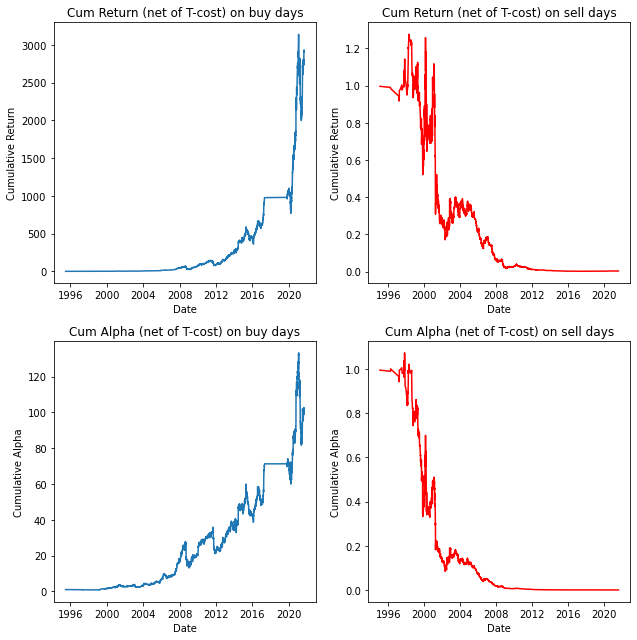

In [7]:
# 1 day holding period
cp.get_returns_turnover_Tcost_summary_plusPlots(data_smaller)


There are  0  returns that dont match using .mean() vs. using equal weights

There are  0  alphas that dont match using .mean() vs. using equal weights

There are  2  returns that dont match using .mean() vs. using equal weights

There are  0  alphas that dont match using .mean() vs. using equal weights

All weights sum to one for Buys

All weights sum to one for Sells
Regression for Buy Portfolio
                            OLS Regression Results                            
Dep. Variable:           ew_return-RF   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     2.034
Date:                Sat, 04 Dec 2021   Prob (F-statistic):             0.0578
Time:                        20:28:03   Log-Likelihood:                 12488.
No. Observations:                5054   AIC:                        -2.496e+04
Df Residuals:                    5047   BIC: 

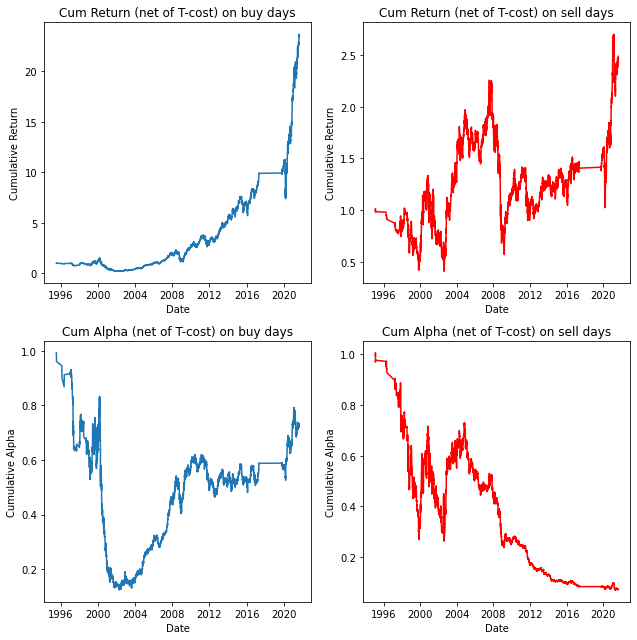

In [8]:
# 5 day holding period
cp.get_returns_turnover_Tcost_summary_plusPlots(data_smaller5)


There are  0  returns that dont match using .mean() vs. using equal weights

There are  0  alphas that dont match using .mean() vs. using equal weights

There are  1  returns that dont match using .mean() vs. using equal weights

There are  0  alphas that dont match using .mean() vs. using equal weights

All weights sum to one for Buys

All weights sum to one for Sells
Regression for Buy Portfolio
                            OLS Regression Results                            
Dep. Variable:           ew_return-RF   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     2.291
Date:                Sat, 04 Dec 2021   Prob (F-statistic):             0.0328
Time:                        20:28:20   Log-Likelihood:                 13426.
No. Observations:                5290   AIC:                        -2.684e+04
Df Residuals:                    5283   BIC: 

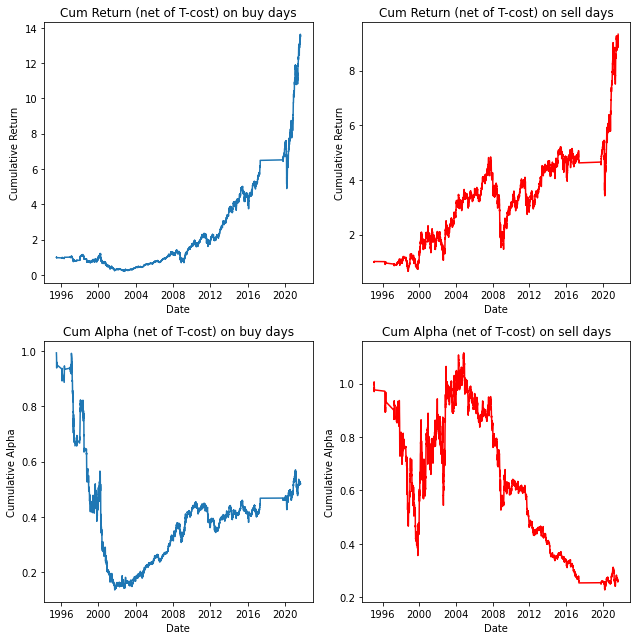

In [9]:
# 10 day holding period
cp.get_returns_turnover_Tcost_summary_plusPlots(data_smaller10)


There are  0  returns that dont match using .mean() vs. using equal weights

There are  0  alphas that dont match using .mean() vs. using equal weights

There are  0  returns that dont match using .mean() vs. using equal weights

There are  0  alphas that dont match using .mean() vs. using equal weights

All weights sum to one for Buys

All weights sum to one for Sells
Regression for Buy Portfolio
                            OLS Regression Results                            
Dep. Variable:           ew_return-RF   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     2.891
Date:                Sat, 04 Dec 2021   Prob (F-statistic):            0.00815
Time:                        20:28:39   Log-Likelihood:                 13856.
No. Observations:                5419   AIC:                        -2.770e+04
Df Residuals:                    5412   BIC: 

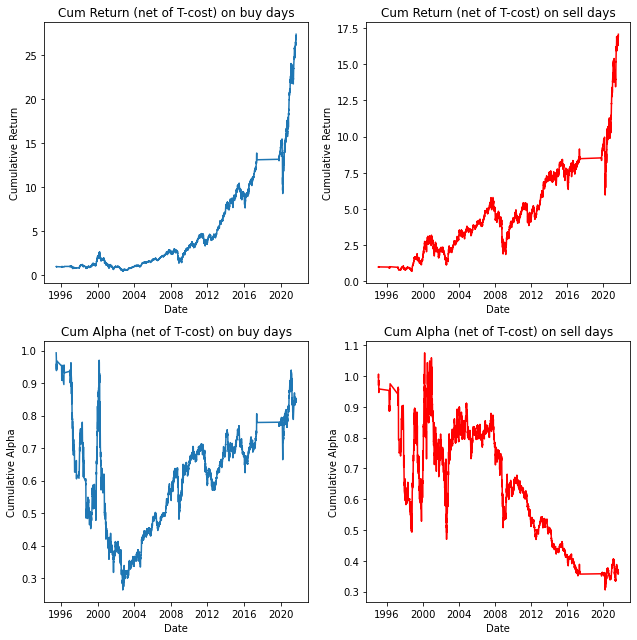

In [10]:
# 15 day holding period
cp.get_returns_turnover_Tcost_summary_plusPlots(data_smaller15)


There are  1  returns that dont match using .mean() vs. using equal weights

There are  0  alphas that dont match using .mean() vs. using equal weights

There are  2  returns that dont match using .mean() vs. using equal weights

There are  0  alphas that dont match using .mean() vs. using equal weights

All weights sum to one for Buys

All weights sum to one for Sells
Regression for Buy Portfolio
                            OLS Regression Results                            
Dep. Variable:           ew_return-RF   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     2.563
Date:                Sat, 04 Dec 2021   Prob (F-statistic):             0.0176
Time:                        20:28:59   Log-Likelihood:                 14160.
No. Observations:                5495   AIC:                        -2.831e+04
Df Residuals:                    5488   BIC: 

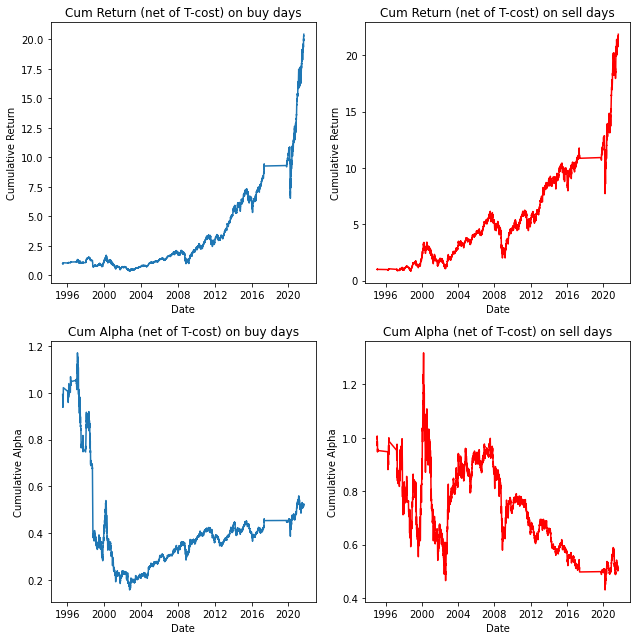

In [11]:
# 20 day holding period
cp.get_returns_turnover_Tcost_summary_plusPlots(data_smaller20)

# BREAK!
# BREAK!
# BREAK!

# Now, let's do the same thing but using the epslowa1 estimate!

In [12]:
#### Please run the line below once in order to get "data_with_rets.pkl" from "afp_data_sample_1995_onward_v2.csv"
#cp.get_data(flag=True)

data = pd.read_pickle('data_with_rets.pkl') #reload the data in order to start from scratch!!!

data = data.sort_values(['osid', 'tradedate']).reset_index(drop=True).copy()

data = data[data['epslowa3'].notna()].reset_index(drop=True).copy()


data['buy_tomorrow'] = np.where(data['epslowa3'].diff(1) > 0, 1, 0)
data['sell_tomorrow'] = np.where(data['epslowa3'].diff(1) < 0, 1, 0)


print('Total number of Buys: ',np.count_nonzero(data['buy_tomorrow']))
print('Total number of Sells: ',np.count_nonzero(data['sell_tomorrow']))

print('Unique buy_tomorrow values: ',np.unique(data['buy_tomorrow'])) #there are only 0 or 1 values in 'buy_tomorrow'
print('Unique sell_tomorrow values: ',np.unique(data['sell_tomorrow'])) #there are only 0 or 1 values in 'sell_tomorrow'



data = cp.trade_on_valid_lags_only(data)

data_smaller,data_smaller5,data_smaller10,data_smaller15,data_smaller20 = cp.pull_signal_forward(data)

data_smaller20 = cp.trade_on_valid_lags_only(data_smaller20)
data_smaller15 = cp.trade_on_valid_lags_only(data_smaller15)
data_smaller10 = cp.trade_on_valid_lags_only(data_smaller10)
data_smaller5 = cp.trade_on_valid_lags_only(data_smaller5)
data_smaller = cp.trade_on_valid_lags_only(data_smaller)

Total number of Buys:  17845
Total number of Sells:  19076
Unique buy_tomorrow values:  [0 1]
Unique sell_tomorrow values:  [0 1]

There are  147  problems for buying

There are  167  problems for selling
Total number of Buys:  17698
Total number of Sells:  18909

There are  362  problems for buying

There are  393  problems for selling
Total number of Buys:  191932
Total number of Sells:  178500

There are  308  problems for buying

There are  320  problems for selling
Total number of Buys:  152104
Total number of Sells:  142817

There are  225  problems for buying

There are  241  problems for selling
Total number of Buys:  109660
Total number of Sells:  104424

There are  143  problems for buying

There are  157  problems for selling
Total number of Buys:  63823
Total number of Sells:  62300

There are  2  problems for buying

There are  0  problems for selling
Total number of Buys:  17681
Total number of Sells:  18901



There are  1  returns that dont match using .mean() vs. using equal weights

There are  0  alphas that dont match using .mean() vs. using equal weights

There are  2  returns that dont match using .mean() vs. using equal weights

There are  0  alphas that dont match using .mean() vs. using equal weights

All weights sum to one for Buys

All weights sum to one for Sells
Regression for Buy Portfolio
                            OLS Regression Results                            
Dep. Variable:           ew_return-RF   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     1.871
Date:                Sat, 04 Dec 2021   Prob (F-statistic):             0.0819
Time:                        20:30:22   Log-Likelihood:                 8763.1
No. Observations:                4014   AIC:                        -1.751e+04
Df Residuals:                    4007   BIC: 

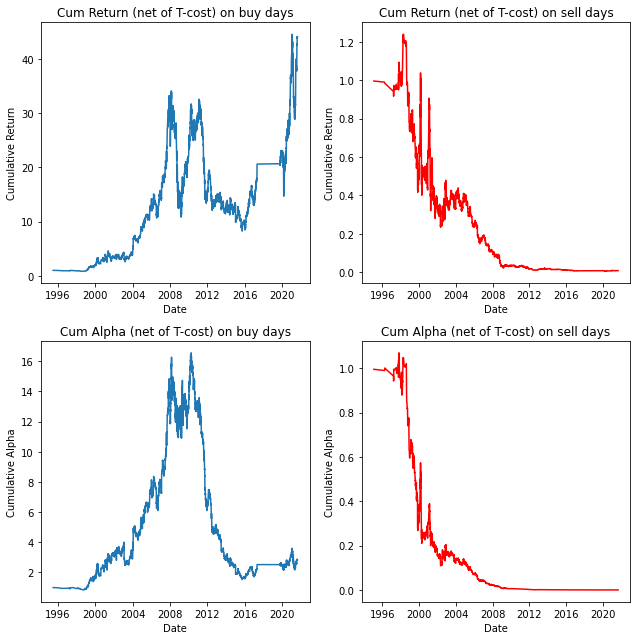

In [13]:
# 1 day holding period
cp.get_returns_turnover_Tcost_summary_plusPlots(data_smaller)


There are  0  returns that dont match using .mean() vs. using equal weights

There are  0  alphas that dont match using .mean() vs. using equal weights

There are  0  returns that dont match using .mean() vs. using equal weights

There are  0  alphas that dont match using .mean() vs. using equal weights

All weights sum to one for Buys

All weights sum to one for Sells
Regression for Buy Portfolio
                            OLS Regression Results                            
Dep. Variable:           ew_return-RF   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     2.129
Date:                Sat, 04 Dec 2021   Prob (F-statistic):             0.0470
Time:                        20:30:38   Log-Likelihood:                 12348.
No. Observations:                5087   AIC:                        -2.468e+04
Df Residuals:                    5080   BIC: 

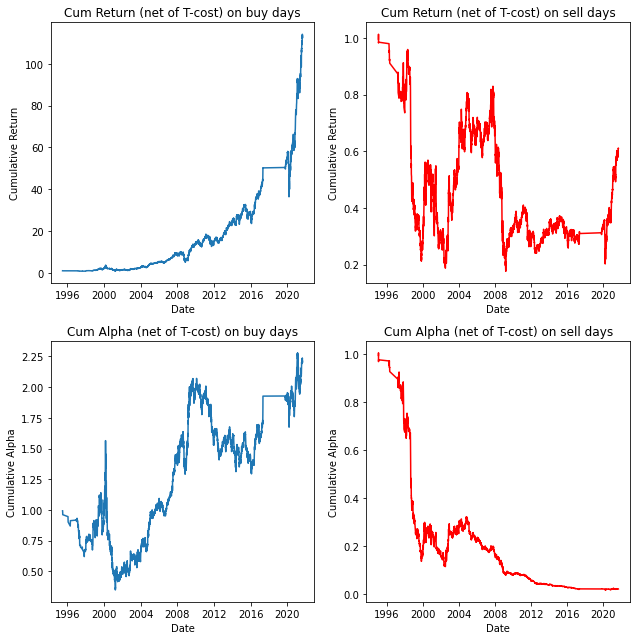

In [14]:
# 5 day holding period
cp.get_returns_turnover_Tcost_summary_plusPlots(data_smaller5)


There are  2  returns that dont match using .mean() vs. using equal weights

There are  0  alphas that dont match using .mean() vs. using equal weights

There are  1  returns that dont match using .mean() vs. using equal weights

There are  0  alphas that dont match using .mean() vs. using equal weights

All weights sum to one for Buys

All weights sum to one for Sells
Regression for Buy Portfolio
                            OLS Regression Results                            
Dep. Variable:           ew_return-RF   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     2.353
Date:                Sat, 04 Dec 2021   Prob (F-statistic):             0.0285
Time:                        20:30:54   Log-Likelihood:                 13411.
No. Observations:                5357   AIC:                        -2.681e+04
Df Residuals:                    5350   BIC: 

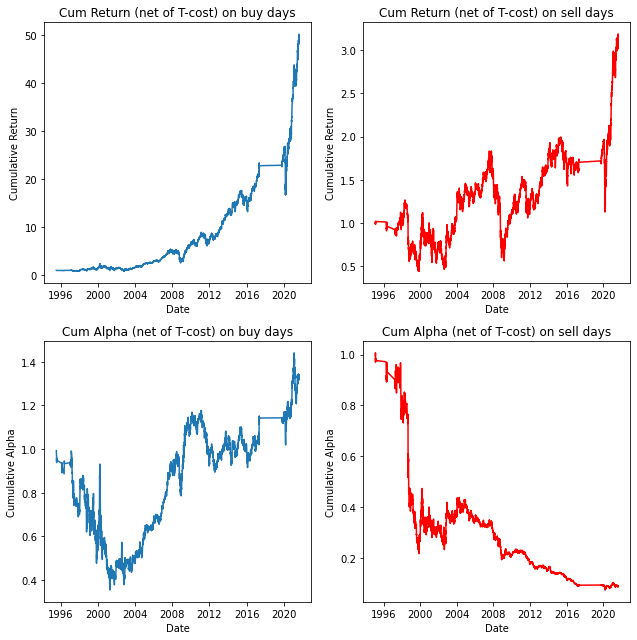

In [15]:
# 10 day holding period
cp.get_returns_turnover_Tcost_summary_plusPlots(data_smaller10)


There are  0  returns that dont match using .mean() vs. using equal weights

There are  0  alphas that dont match using .mean() vs. using equal weights

There are  0  returns that dont match using .mean() vs. using equal weights

There are  0  alphas that dont match using .mean() vs. using equal weights

All weights sum to one for Buys

All weights sum to one for Sells
Regression for Buy Portfolio
                            OLS Regression Results                            
Dep. Variable:           ew_return-RF   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     2.841
Date:                Sat, 04 Dec 2021   Prob (F-statistic):            0.00920
Time:                        20:31:14   Log-Likelihood:                 13941.
No. Observations:                5478   AIC:                        -2.787e+04
Df Residuals:                    5471   BIC: 

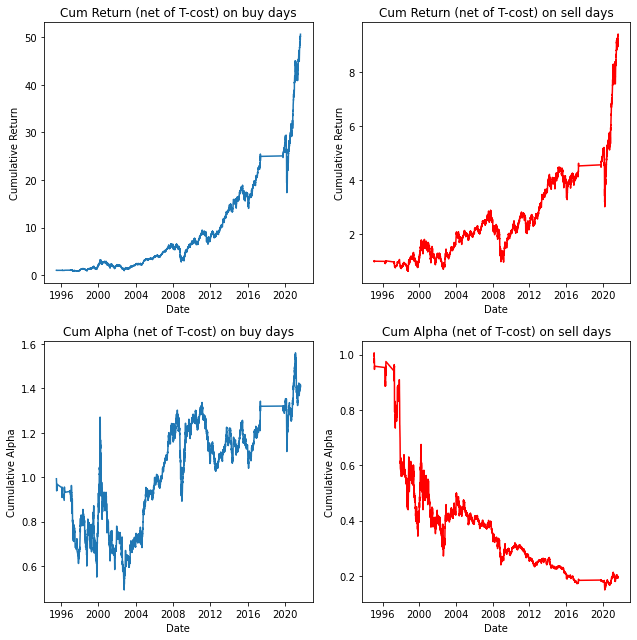

In [16]:
# 15 day holding period
cp.get_returns_turnover_Tcost_summary_plusPlots(data_smaller15)


There are  1  returns that dont match using .mean() vs. using equal weights

There are  0  alphas that dont match using .mean() vs. using equal weights

There are  0  returns that dont match using .mean() vs. using equal weights

There are  0  alphas that dont match using .mean() vs. using equal weights

All weights sum to one for Buys

All weights sum to one for Sells
Regression for Buy Portfolio
                            OLS Regression Results                            
Dep. Variable:           ew_return-RF   R-squared:                       0.004
Model:                            OLS   Adj. R-squared:                  0.003
Method:                 Least Squares   F-statistic:                     3.446
Date:                Sat, 04 Dec 2021   Prob (F-statistic):            0.00212
Time:                        20:31:35   Log-Likelihood:                 14182.
No. Observations:                5554   AIC:                        -2.835e+04
Df Residuals:                    5547   BIC: 

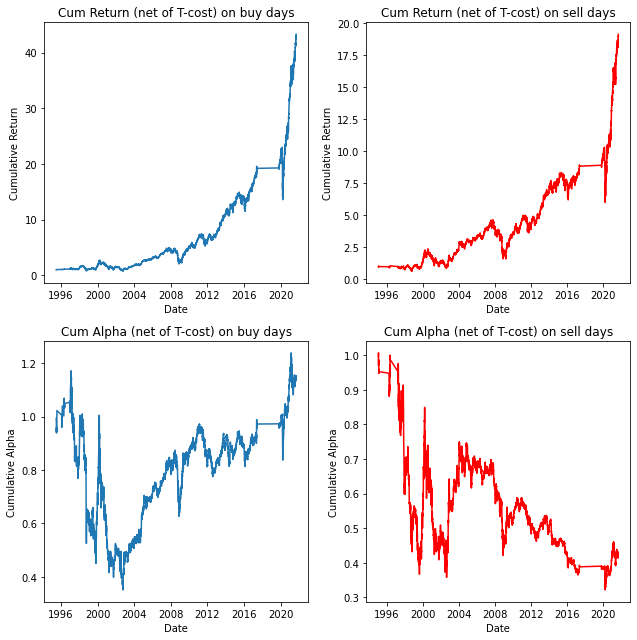

In [17]:
# 20 day holding period
cp.get_returns_turnover_Tcost_summary_plusPlots(data_smaller20)

# BREAK!
# BREAK!
# BREAK!

# Now, let's do the same thing but using BOTH epshigha1 & epslowa1 estimate!

In [18]:
#### Please run the line below once in order to get "data_with_rets.pkl" from "afp_data_sample_1995_onward_v2.csv"
#cp.get_data(flag=True)

data = pd.read_pickle('data_with_rets.pkl') #reload the data in order to start from scratch!!!

data = data.sort_values(['osid', 'tradedate']).reset_index(drop=True).copy()

data = data[data['epslowa3'].notna()].reset_index(drop=True).copy()
data = data[data['epshigha3'].notna()].reset_index(drop=True).copy()

data['midpoint_eps_estimate'] = (data['epslowa3'] + data['epshigha3']) / 2

data = data[data['midpoint_eps_estimate'].notna()].reset_index(drop=True).copy()

data['buy_tomorrow'] = np.where(data['midpoint_eps_estimate'].diff(1) > 0, 1, 0)
data['sell_tomorrow'] = np.where(data['midpoint_eps_estimate'].diff(1) < 0, 1, 0)


print('Total number of Buys: ',np.count_nonzero(data['buy_tomorrow']))
print('Total number of Sells: ',np.count_nonzero(data['sell_tomorrow']))

print('Unique buy_tomorrow values: ',np.unique(data['buy_tomorrow'])) #there are only 0 or 1 values in 'buy_tomorrow'
print('Unique sell_tomorrow values: ',np.unique(data['sell_tomorrow'])) #there are only 0 or 1 values in 'sell_tomorrow'



data = cp.trade_on_valid_lags_only(data)

data_smaller,data_smaller5,data_smaller10,data_smaller15,data_smaller20 = cp.pull_signal_forward(data)

data_smaller20 = cp.trade_on_valid_lags_only(data_smaller20)
data_smaller15 = cp.trade_on_valid_lags_only(data_smaller15)
data_smaller10 = cp.trade_on_valid_lags_only(data_smaller10)
data_smaller5 = cp.trade_on_valid_lags_only(data_smaller5)
data_smaller = cp.trade_on_valid_lags_only(data_smaller)

Total number of Buys:  22556
Total number of Sells:  22727
Unique buy_tomorrow values:  [0 1]
Unique sell_tomorrow values:  [0 1]

There are  222  problems for buying

There are  184  problems for selling
Total number of Buys:  22334
Total number of Sells:  22543

There are  520  problems for buying

There are  497  problems for selling
Total number of Buys:  243959
Total number of Sells:  220225

There are  446  problems for buying

There are  409  problems for selling
Total number of Buys:  196201
Total number of Sells:  178062

There are  335  problems for buying

There are  315  problems for selling
Total number of Buys:  143085
Total number of Sells:  131102

There are  211  problems for buying

There are  200  problems for selling
Total number of Buys:  83167
Total number of Sells:  77662

There are  2  problems for buying

There are  0  problems for selling
Total number of Buys:  22311
Total number of Sells:  22536



There are  2  returns that dont match using .mean() vs. using equal weights

There are  0  alphas that dont match using .mean() vs. using equal weights

There are  2  returns that dont match using .mean() vs. using equal weights

There are  0  alphas that dont match using .mean() vs. using equal weights

All weights sum to one for Buys

All weights sum to one for Sells
Regression for Buy Portfolio
                            OLS Regression Results                            
Dep. Variable:           ew_return-RF   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     2.127
Date:                Sat, 04 Dec 2021   Prob (F-statistic):             0.0472
Time:                        20:32:42   Log-Likelihood:                 9267.8
No. Observations:                4183   AIC:                        -1.852e+04
Df Residuals:                    4176   BIC: 

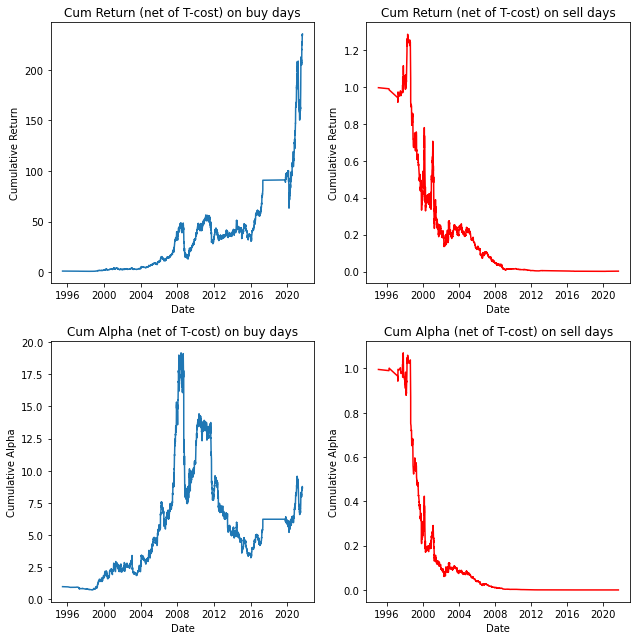

In [19]:
# 1 day holding period
cp.get_returns_turnover_Tcost_summary_plusPlots(data_smaller)


There are  0  returns that dont match using .mean() vs. using equal weights

There are  0  alphas that dont match using .mean() vs. using equal weights

There are  1  returns that dont match using .mean() vs. using equal weights

There are  0  alphas that dont match using .mean() vs. using equal weights

All weights sum to one for Buys

All weights sum to one for Sells
Regression for Buy Portfolio
                            OLS Regression Results                            
Dep. Variable:           ew_return-RF   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     1.833
Date:                Sat, 04 Dec 2021   Prob (F-statistic):             0.0888
Time:                        20:32:57   Log-Likelihood:                 12664.
No. Observations:                5127   AIC:                        -2.531e+04
Df Residuals:                    5120   BIC: 

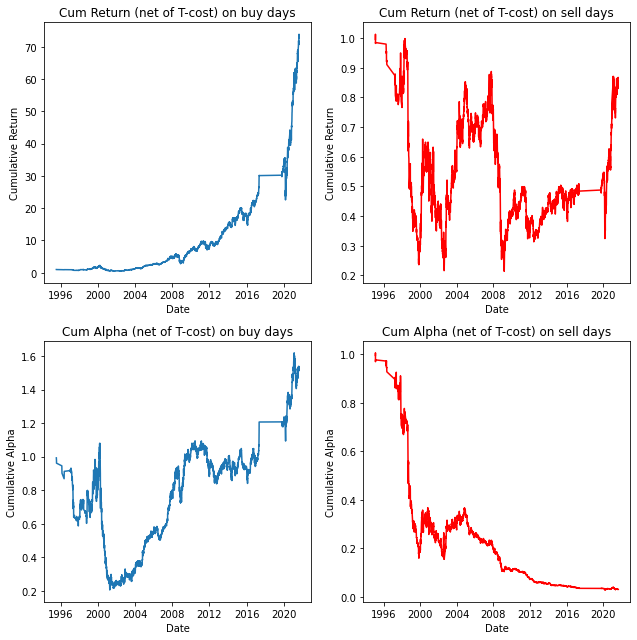

In [20]:
# 5 day holding period
cp.get_returns_turnover_Tcost_summary_plusPlots(data_smaller5)


There are  1  returns that dont match using .mean() vs. using equal weights

There are  0  alphas that dont match using .mean() vs. using equal weights

There are  0  returns that dont match using .mean() vs. using equal weights

There are  0  alphas that dont match using .mean() vs. using equal weights

All weights sum to one for Buys

All weights sum to one for Sells
Regression for Buy Portfolio
                            OLS Regression Results                            
Dep. Variable:           ew_return-RF   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     2.171
Date:                Sat, 04 Dec 2021   Prob (F-statistic):             0.0428
Time:                        20:33:15   Log-Likelihood:                 13586.
No. Observations:                5373   AIC:                        -2.716e+04
Df Residuals:                    5366   BIC: 

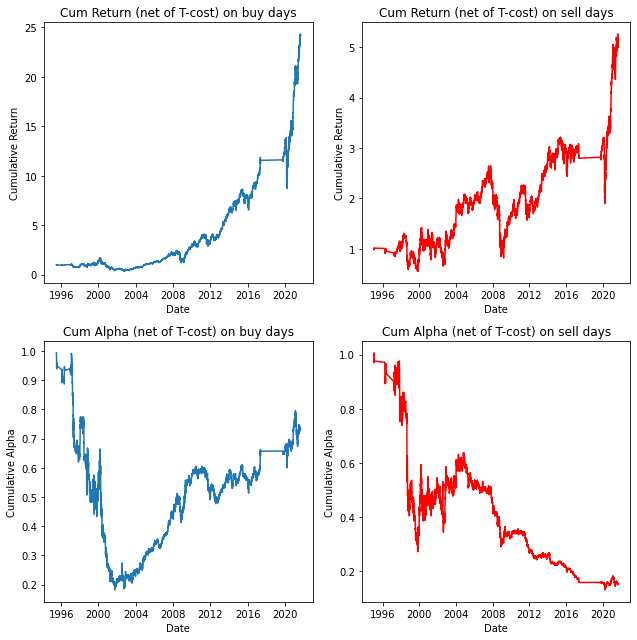

In [21]:
# 10 day holding period
cp.get_returns_turnover_Tcost_summary_plusPlots(data_smaller10)


There are  0  returns that dont match using .mean() vs. using equal weights

There are  0  alphas that dont match using .mean() vs. using equal weights

There are  1  returns that dont match using .mean() vs. using equal weights

There are  0  alphas that dont match using .mean() vs. using equal weights

All weights sum to one for Buys

All weights sum to one for Sells
Regression for Buy Portfolio
                            OLS Regression Results                            
Dep. Variable:           ew_return-RF   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     2.666
Date:                Sat, 04 Dec 2021   Prob (F-statistic):             0.0139
Time:                        20:33:38   Log-Likelihood:                 14015.
No. Observations:                5485   AIC:                        -2.802e+04
Df Residuals:                    5478   BIC: 

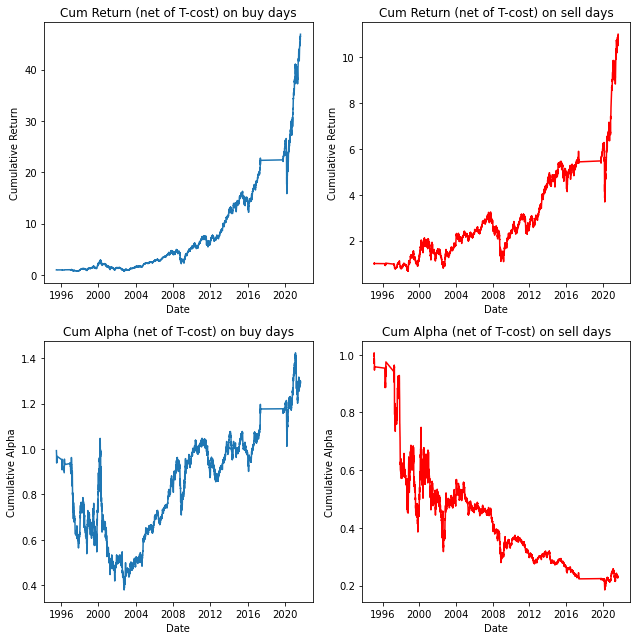

In [22]:
# 15 day holding period
cp.get_returns_turnover_Tcost_summary_plusPlots(data_smaller15)


There are  4  returns that dont match using .mean() vs. using equal weights

There are  0  alphas that dont match using .mean() vs. using equal weights

There are  1  returns that dont match using .mean() vs. using equal weights

There are  0  alphas that dont match using .mean() vs. using equal weights

All weights sum to one for Buys

All weights sum to one for Sells
Regression for Buy Portfolio
                            OLS Regression Results                            
Dep. Variable:           ew_return-RF   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     3.182
Date:                Sat, 04 Dec 2021   Prob (F-statistic):            0.00405
Time:                        20:33:59   Log-Likelihood:                 14239.
No. Observations:                5560   AIC:                        -2.846e+04
Df Residuals:                    5553   BIC: 

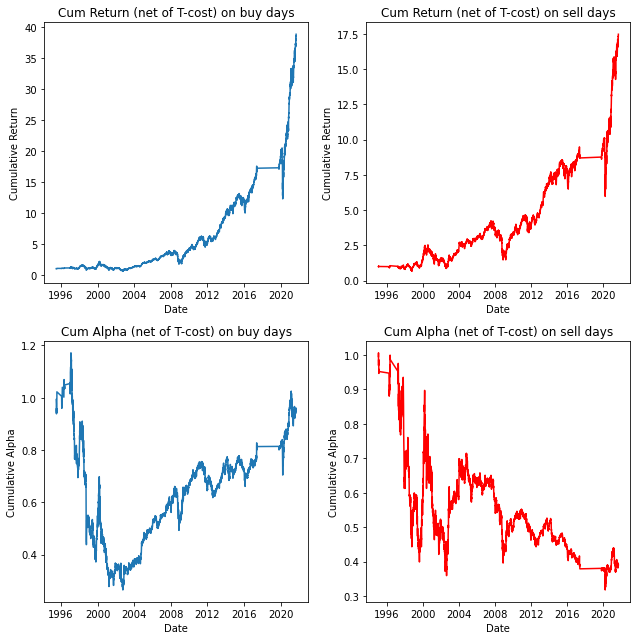

In [23]:
# 20 day holding period
cp.get_returns_turnover_Tcost_summary_plusPlots(data_smaller20)

# BREAK!
# BREAK!
# BREAK!

# Now let's trade on moves in saleshigha1

In [24]:
#### Please run the line below once in order to get "data_with_rets.pkl" from "afp_data_sample_1995_onward_v2.csv"
#cp.get_data(flag=True)

data = pd.read_pickle('data_with_rets.pkl') #reload the data in order to start from scratch!!!

data = data.sort_values(['osid', 'tradedate']).reset_index(drop=True).copy()

data = data[data['saleshigha3'].notna()].reset_index(drop=True).copy()

data['buy_tomorrow'] = np.where(data['saleshigha3'].diff(1) > 0, 1, 0)
data['sell_tomorrow'] = np.where(data['saleshigha3'].diff(1) < 0, 1, 0)


print('Total number of Buys: ',np.count_nonzero(data['buy_tomorrow']))
print('Total number of Sells: ',np.count_nonzero(data['sell_tomorrow']))

print('Unique buy_tomorrow values: ',np.unique(data['buy_tomorrow'])) #there are only 0 or 1 values in 'buy_tomorrow'
print('Unique sell_tomorrow values: ',np.unique(data['sell_tomorrow'])) #there are only 0 or 1 values in 'sell_tomorrow'



data = cp.trade_on_valid_lags_only(data)

data_smaller,data_smaller5,data_smaller10,data_smaller15,data_smaller20 = cp.pull_signal_forward(data)

data_smaller20 = cp.trade_on_valid_lags_only(data_smaller20)
data_smaller15 = cp.trade_on_valid_lags_only(data_smaller15)
data_smaller10 = cp.trade_on_valid_lags_only(data_smaller10)
data_smaller5 = cp.trade_on_valid_lags_only(data_smaller5)
data_smaller = cp.trade_on_valid_lags_only(data_smaller)

Total number of Buys:  19111
Total number of Sells:  18377
Unique buy_tomorrow values:  [0 1]
Unique sell_tomorrow values:  [0 1]

There are  171  problems for buying

There are  124  problems for selling
Total number of Buys:  18940
Total number of Sells:  18253

There are  369  problems for buying

There are  288  problems for selling
Total number of Buys:  207260
Total number of Sells:  158442

There are  316  problems for buying

There are  243  problems for selling
Total number of Buys:  165014
Total number of Sells:  126638

There are  244  problems for buying

There are  196  problems for selling
Total number of Buys:  119285
Total number of Sells:  92839

There are  167  problems for buying

There are  134  problems for selling
Total number of Buys:  69249
Total number of Sells:  56238

There are  2  problems for buying

There are  1  problems for selling
Total number of Buys:  18923
Total number of Sells:  18240



There are  1  returns that dont match using .mean() vs. using equal weights

There are  0  alphas that dont match using .mean() vs. using equal weights

There are  0  returns that dont match using .mean() vs. using equal weights

There are  0  alphas that dont match using .mean() vs. using equal weights

All weights sum to one for Buys

All weights sum to one for Sells
Regression for Buy Portfolio
                            OLS Regression Results                            
Dep. Variable:           ew_return-RF   R-squared:                       0.004
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     2.330
Date:                Sat, 04 Dec 2021   Prob (F-statistic):             0.0301
Time:                        20:34:59   Log-Likelihood:                 8355.1
No. Observations:                3876   AIC:                        -1.670e+04
Df Residuals:                    3869   BIC: 

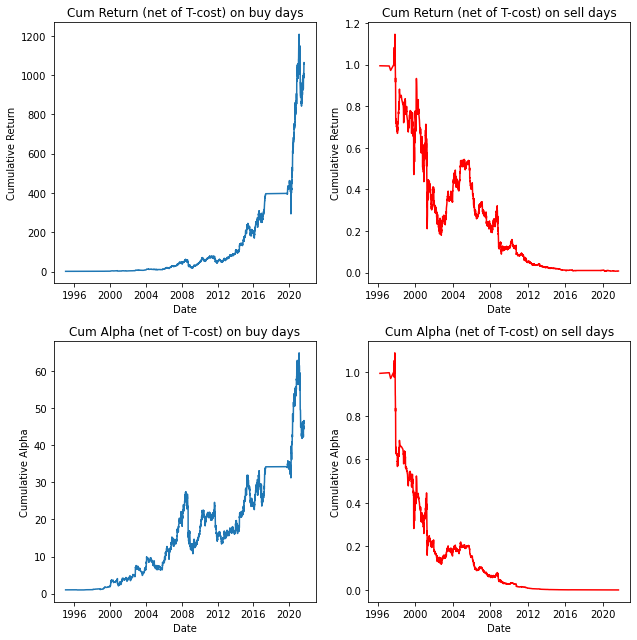

In [25]:
# 1 day holding period
cp.get_returns_turnover_Tcost_summary_plusPlots(data_smaller)


There are  0  returns that dont match using .mean() vs. using equal weights

There are  0  alphas that dont match using .mean() vs. using equal weights

There are  1  returns that dont match using .mean() vs. using equal weights

There are  0  alphas that dont match using .mean() vs. using equal weights

All weights sum to one for Buys

All weights sum to one for Sells
Regression for Buy Portfolio
                            OLS Regression Results                            
Dep. Variable:           ew_return-RF   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     2.289
Date:                Sat, 04 Dec 2021   Prob (F-statistic):             0.0329
Time:                        20:35:14   Log-Likelihood:                 12144.
No. Observations:                4992   AIC:                        -2.427e+04
Df Residuals:                    4985   BIC: 

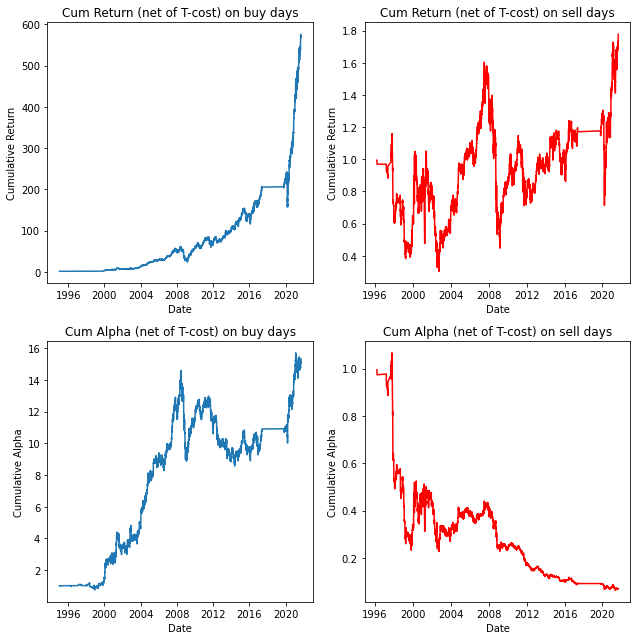

In [26]:
# 5 day holding period
cp.get_returns_turnover_Tcost_summary_plusPlots(data_smaller5)


There are  0  returns that dont match using .mean() vs. using equal weights

There are  0  alphas that dont match using .mean() vs. using equal weights

There are  1  returns that dont match using .mean() vs. using equal weights

There are  0  alphas that dont match using .mean() vs. using equal weights

All weights sum to one for Buys

All weights sum to one for Sells
Regression for Buy Portfolio
                            OLS Regression Results                            
Dep. Variable:           ew_return-RF   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     2.667
Date:                Sat, 04 Dec 2021   Prob (F-statistic):             0.0138
Time:                        20:35:34   Log-Likelihood:                 13192.
No. Observations:                5243   AIC:                        -2.637e+04
Df Residuals:                    5236   BIC: 

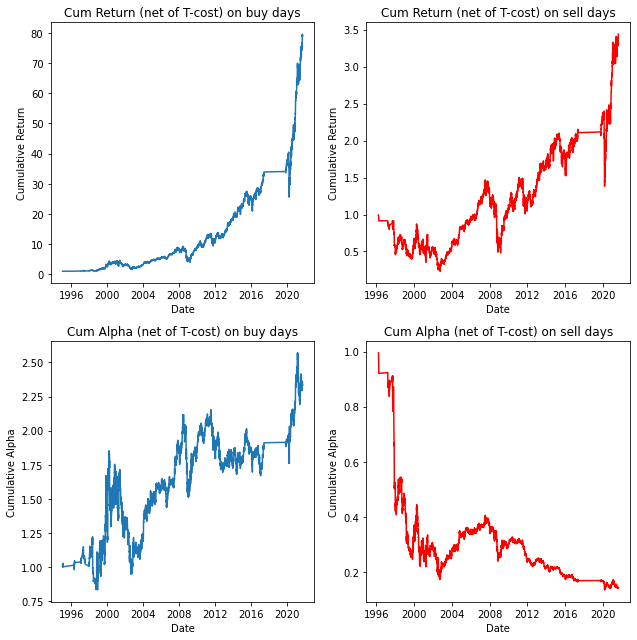

In [27]:
# 10 day holding period
cp.get_returns_turnover_Tcost_summary_plusPlots(data_smaller10)


There are  1  returns that dont match using .mean() vs. using equal weights

There are  0  alphas that dont match using .mean() vs. using equal weights

There are  2  returns that dont match using .mean() vs. using equal weights

There are  0  alphas that dont match using .mean() vs. using equal weights

All weights sum to one for Buys

All weights sum to one for Sells
Regression for Buy Portfolio
                            OLS Regression Results                            
Dep. Variable:           ew_return-RF   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     2.767
Date:                Sat, 04 Dec 2021   Prob (F-statistic):             0.0110
Time:                        20:35:55   Log-Likelihood:                 13583.
No. Observations:                5352   AIC:                        -2.715e+04
Df Residuals:                    5345   BIC: 

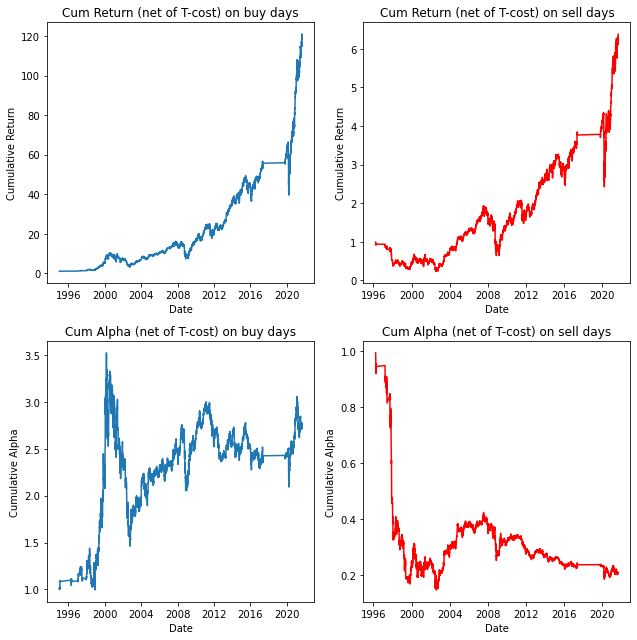

In [28]:
# 15 day holding period
cp.get_returns_turnover_Tcost_summary_plusPlots(data_smaller15)


There are  0  returns that dont match using .mean() vs. using equal weights

There are  0  alphas that dont match using .mean() vs. using equal weights

There are  0  returns that dont match using .mean() vs. using equal weights

There are  0  alphas that dont match using .mean() vs. using equal weights

All weights sum to one for Buys

All weights sum to one for Sells
Regression for Buy Portfolio
                            OLS Regression Results                            
Dep. Variable:           ew_return-RF   R-squared:                       0.004
Model:                            OLS   Adj. R-squared:                  0.003
Method:                 Least Squares   F-statistic:                     3.452
Date:                Sat, 04 Dec 2021   Prob (F-statistic):            0.00210
Time:                        20:36:14   Log-Likelihood:                 13962.
No. Observations:                5419   AIC:                        -2.791e+04
Df Residuals:                    5412   BIC: 

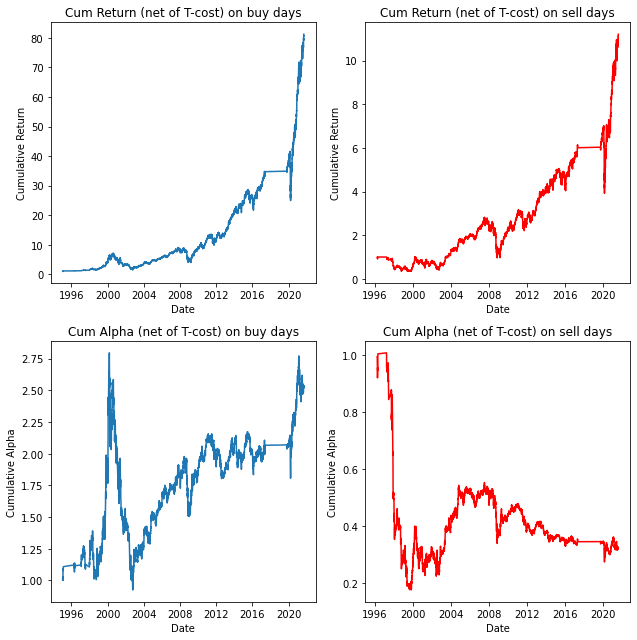

In [29]:
# 20 day holding period
cp.get_returns_turnover_Tcost_summary_plusPlots(data_smaller20)

# BREAK!
# BREAK!
# BREAK!

# Now let's trade on moves in saleslowa1

In [30]:
#### Please run the line below once in order to get "data_with_rets.pkl" from "afp_data_sample_1995_onward_v2.csv"
#cp.get_data(flag=True)

data = pd.read_pickle('data_with_rets.pkl') #reload the data in order to start from scratch!!!

data = data.sort_values(['osid', 'tradedate']).reset_index(drop=True).copy()

data = data[data['saleslowa3'].notna()].reset_index(drop=True).copy()

data['buy_tomorrow'] = np.where(data['saleslowa3'].diff(1) > 0, 1, 0)
data['sell_tomorrow'] = np.where(data['saleslowa3'].diff(1) < 0, 1, 0)


print('Total number of Buys: ',np.count_nonzero(data['buy_tomorrow']))
print('Total number of Sells: ',np.count_nonzero(data['sell_tomorrow']))

print('Unique buy_tomorrow values: ',np.unique(data['buy_tomorrow'])) #there are only 0 or 1 values in 'buy_tomorrow'
print('Unique sell_tomorrow values: ',np.unique(data['sell_tomorrow'])) #there are only 0 or 1 values in 'sell_tomorrow'



data = cp.trade_on_valid_lags_only(data)

data_smaller,data_smaller5,data_smaller10,data_smaller15,data_smaller20 = cp.pull_signal_forward(data)

data_smaller20 = cp.trade_on_valid_lags_only(data_smaller20)
data_smaller15 = cp.trade_on_valid_lags_only(data_smaller15)
data_smaller10 = cp.trade_on_valid_lags_only(data_smaller10)
data_smaller5 = cp.trade_on_valid_lags_only(data_smaller5)
data_smaller = cp.trade_on_valid_lags_only(data_smaller)

Total number of Buys:  17989
Total number of Sells:  19466
Unique buy_tomorrow values:  [0 1]
Unique sell_tomorrow values:  [0 1]

There are  153  problems for buying

There are  133  problems for selling
Total number of Buys:  17836
Total number of Sells:  19333

There are  339  problems for buying

There are  330  problems for selling
Total number of Buys:  195129
Total number of Sells:  170003

There are  285  problems for buying

There are  278  problems for selling
Total number of Buys:  154722
Total number of Sells:  136415

There are  215  problems for buying

There are  220  problems for selling
Total number of Buys:  111586
Total number of Sells:  100332

There are  147  problems for buying

There are  144  problems for selling
Total number of Buys:  64868
Total number of Sells:  60637

There are  2  problems for buying

There are  1  problems for selling
Total number of Buys:  17822
Total number of Sells:  19318



There are  1  returns that dont match using .mean() vs. using equal weights

There are  0  alphas that dont match using .mean() vs. using equal weights

There are  0  returns that dont match using .mean() vs. using equal weights

There are  0  alphas that dont match using .mean() vs. using equal weights

All weights sum to one for Buys

All weights sum to one for Sells
Regression for Buy Portfolio
                            OLS Regression Results                            
Dep. Variable:           ew_return-RF   R-squared:                       0.005
Model:                            OLS   Adj. R-squared:                  0.004
Method:                 Least Squares   F-statistic:                     3.422
Date:                Sat, 04 Dec 2021   Prob (F-statistic):            0.00227
Time:                        20:37:18   Log-Likelihood:                 8329.1
No. Observations:                3783   AIC:                        -1.664e+04
Df Residuals:                    3776   BIC: 

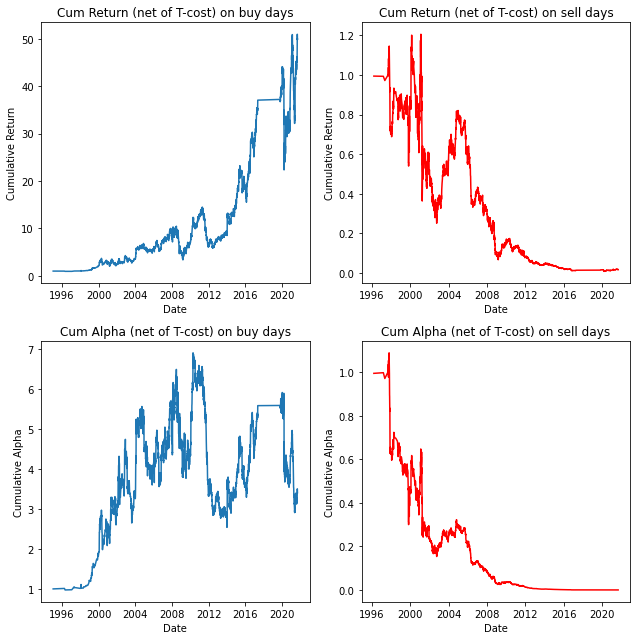

In [31]:
# 1 day holding period
cp.get_returns_turnover_Tcost_summary_plusPlots(data_smaller)


There are  2  returns that dont match using .mean() vs. using equal weights

There are  0  alphas that dont match using .mean() vs. using equal weights

There are  4  returns that dont match using .mean() vs. using equal weights

There are  0  alphas that dont match using .mean() vs. using equal weights

All weights sum to one for Buys

All weights sum to one for Sells
Regression for Buy Portfolio
                            OLS Regression Results                            
Dep. Variable:           ew_return-RF   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     1.782
Date:                Sat, 04 Dec 2021   Prob (F-statistic):             0.0986
Time:                        20:37:36   Log-Likelihood:                 12143.
No. Observations:                4978   AIC:                        -2.427e+04
Df Residuals:                    4971   BIC: 

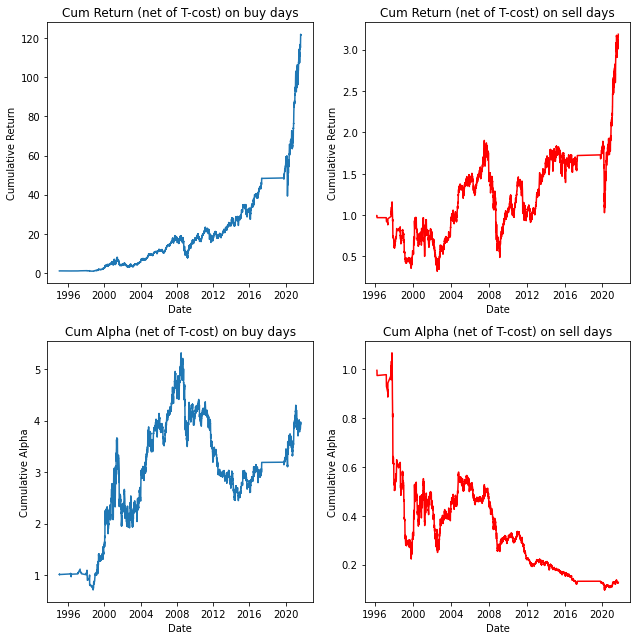

In [32]:
# 5 day holding period
cp.get_returns_turnover_Tcost_summary_plusPlots(data_smaller5)


There are  3  returns that dont match using .mean() vs. using equal weights

There are  0  alphas that dont match using .mean() vs. using equal weights

There are  1  returns that dont match using .mean() vs. using equal weights

There are  0  alphas that dont match using .mean() vs. using equal weights

All weights sum to one for Buys

All weights sum to one for Sells
Regression for Buy Portfolio
                            OLS Regression Results                            
Dep. Variable:           ew_return-RF   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     2.110
Date:                Sat, 04 Dec 2021   Prob (F-statistic):             0.0490
Time:                        20:37:54   Log-Likelihood:                 13086.
No. Observations:                5225   AIC:                        -2.616e+04
Df Residuals:                    5218   BIC: 

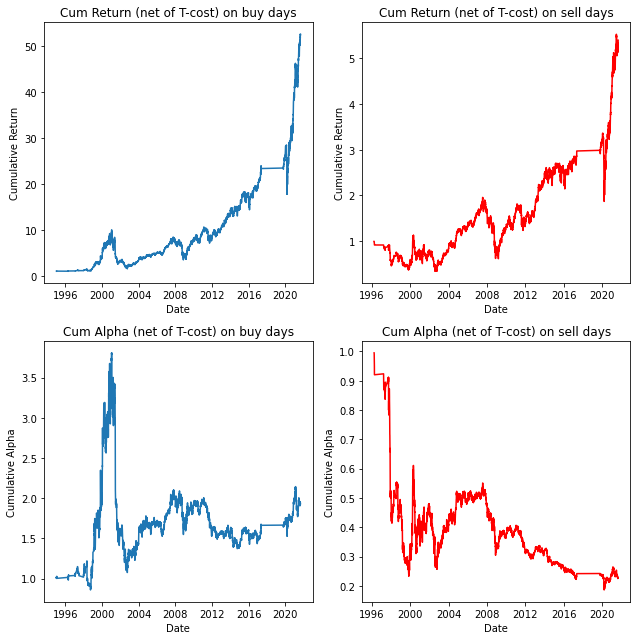

In [33]:
# 10 day holding period
cp.get_returns_turnover_Tcost_summary_plusPlots(data_smaller10)


There are  3  returns that dont match using .mean() vs. using equal weights

There are  0  alphas that dont match using .mean() vs. using equal weights

There are  0  returns that dont match using .mean() vs. using equal weights

There are  0  alphas that dont match using .mean() vs. using equal weights

All weights sum to one for Buys

All weights sum to one for Sells
Regression for Buy Portfolio
                            OLS Regression Results                            
Dep. Variable:           ew_return-RF   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     1.733
Date:                Sat, 04 Dec 2021   Prob (F-statistic):              0.109
Time:                        20:38:13   Log-Likelihood:                 13473.
No. Observations:                5337   AIC:                        -2.693e+04
Df Residuals:                    5330   BIC: 

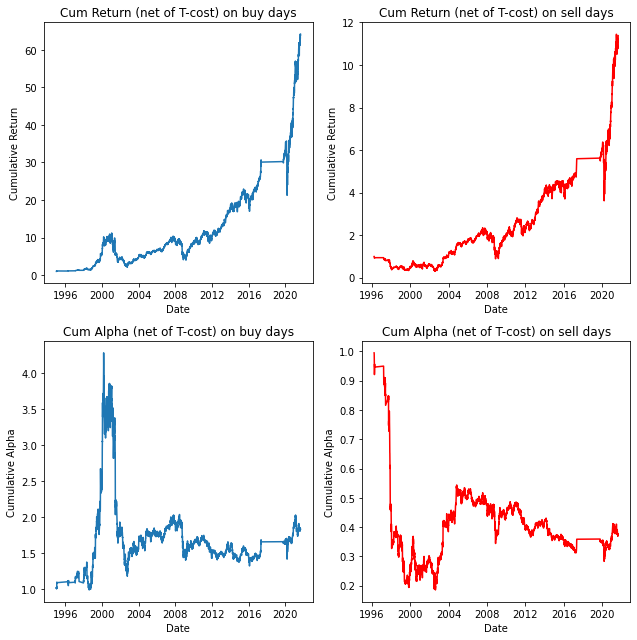

In [34]:
# 15 day holding period
cp.get_returns_turnover_Tcost_summary_plusPlots(data_smaller15)


There are  0  returns that dont match using .mean() vs. using equal weights

There are  0  alphas that dont match using .mean() vs. using equal weights

There are  0  returns that dont match using .mean() vs. using equal weights

There are  0  alphas that dont match using .mean() vs. using equal weights

All weights sum to one for Buys

All weights sum to one for Sells
Regression for Buy Portfolio
                            OLS Regression Results                            
Dep. Variable:           ew_return-RF   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     2.756
Date:                Sat, 04 Dec 2021   Prob (F-statistic):             0.0112
Time:                        20:38:32   Log-Likelihood:                 13773.
No. Observations:                5400   AIC:                        -2.753e+04
Df Residuals:                    5393   BIC: 

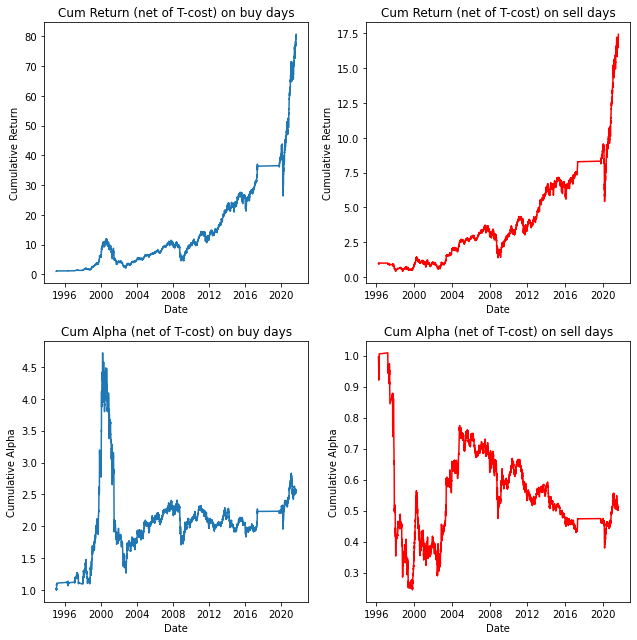

In [35]:
# 20 day holding period
cp.get_returns_turnover_Tcost_summary_plusPlots(data_smaller20)

# BREAK!
# BREAK!
# BREAK!

# Now let's trade on BOTH saleshigha1 & saleslowa1

In [36]:
#### Please run the line below once in order to get "data_with_rets.pkl" from "afp_data_sample_1995_onward_v2.csv"
#cp.get_data(flag=True)

data = pd.read_pickle('data_with_rets.pkl') #reload the data in order to start from scratch!!!

data = data.sort_values(['osid', 'tradedate']).reset_index(drop=True).copy()

data = data[data['saleslowa3'].notna()].reset_index(drop=True).copy()
data = data[data['saleshigha3'].notna()].reset_index(drop=True).copy()

data['midpoint_sales_estimate'] = (data['saleslowa3'] + data['saleshigha3']) / 2

data = data[data['midpoint_sales_estimate'].notna()].reset_index(drop=True).copy()

data['buy_tomorrow'] = np.where(data['midpoint_sales_estimate'].diff(1) > 0, 1, 0)
data['sell_tomorrow'] = np.where(data['midpoint_sales_estimate'].diff(1) < 0, 1, 0)


print('Total number of Buys: ',np.count_nonzero(data['buy_tomorrow']))
print('Total number of Sells: ',np.count_nonzero(data['sell_tomorrow']))

print('Unique buy_tomorrow values: ',np.unique(data['buy_tomorrow'])) #there are only 0 or 1 values in 'buy_tomorrow'
print('Unique sell_tomorrow values: ',np.unique(data['sell_tomorrow'])) #there are only 0 or 1 values in 'sell_tomorrow'



data = cp.trade_on_valid_lags_only(data)

data_smaller,data_smaller5,data_smaller10,data_smaller15,data_smaller20 = cp.pull_signal_forward(data)

data_smaller20 = cp.trade_on_valid_lags_only(data_smaller20)
data_smaller15 = cp.trade_on_valid_lags_only(data_smaller15)
data_smaller10 = cp.trade_on_valid_lags_only(data_smaller10)
data_smaller5 = cp.trade_on_valid_lags_only(data_smaller5)
data_smaller = cp.trade_on_valid_lags_only(data_smaller)

Total number of Buys:  22895
Total number of Sells:  22909
Unique buy_tomorrow values:  [0 1]
Unique sell_tomorrow values:  [0 1]

There are  190  problems for buying

There are  164  problems for selling
Total number of Buys:  22705
Total number of Sells:  22745

There are  466  problems for buying

There are  411  problems for selling
Total number of Buys:  246215
Total number of Sells:  210022

There are  396  problems for buying

There are  349  problems for selling
Total number of Buys:  198643
Total number of Sells:  170205

There are  305  problems for buying

There are  277  problems for selling
Total number of Buys:  145325
Total number of Sells:  125938

There are  211  problems for buying

There are  178  problems for selling
Total number of Buys:  84689
Total number of Sells:  75397

There are  2  problems for buying

There are  1  problems for selling
Total number of Buys:  22687
Total number of Sells:  22728



There are  1  returns that dont match using .mean() vs. using equal weights

There are  0  alphas that dont match using .mean() vs. using equal weights

There are  0  returns that dont match using .mean() vs. using equal weights

There are  0  alphas that dont match using .mean() vs. using equal weights

All weights sum to one for Buys

All weights sum to one for Sells
Regression for Buy Portfolio
                            OLS Regression Results                            
Dep. Variable:           ew_return-RF   R-squared:                       0.004
Model:                            OLS   Adj. R-squared:                  0.003
Method:                 Least Squares   F-statistic:                     2.813
Date:                Sat, 04 Dec 2021   Prob (F-statistic):            0.00986
Time:                        20:39:38   Log-Likelihood:                 8892.5
No. Observations:                4011   AIC:                        -1.777e+04
Df Residuals:                    4004   BIC: 

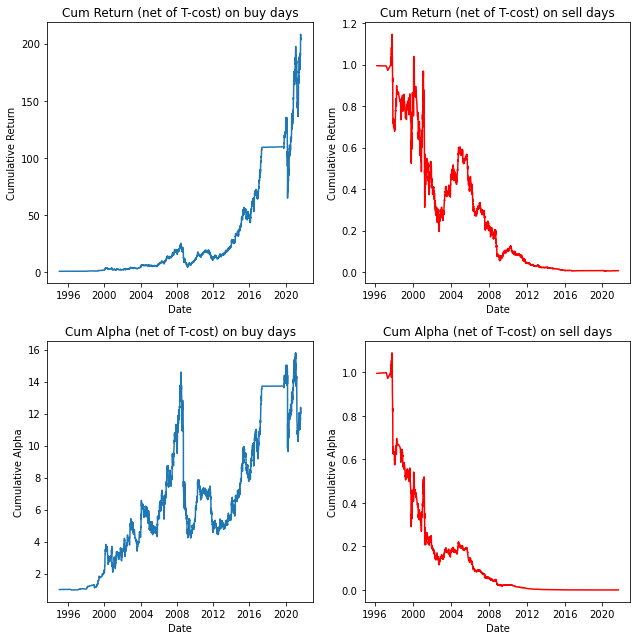

In [37]:
# 1 day holding period
cp.get_returns_turnover_Tcost_summary_plusPlots(data_smaller)


There are  0  returns that dont match using .mean() vs. using equal weights

There are  0  alphas that dont match using .mean() vs. using equal weights

There are  1  returns that dont match using .mean() vs. using equal weights

There are  0  alphas that dont match using .mean() vs. using equal weights

All weights sum to one for Buys

All weights sum to one for Sells
Regression for Buy Portfolio
                            OLS Regression Results                            
Dep. Variable:           ew_return-RF   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     1.818
Date:                Sat, 04 Dec 2021   Prob (F-statistic):             0.0914
Time:                        20:39:56   Log-Likelihood:                 12374.
No. Observations:                5055   AIC:                        -2.473e+04
Df Residuals:                    5048   BIC: 

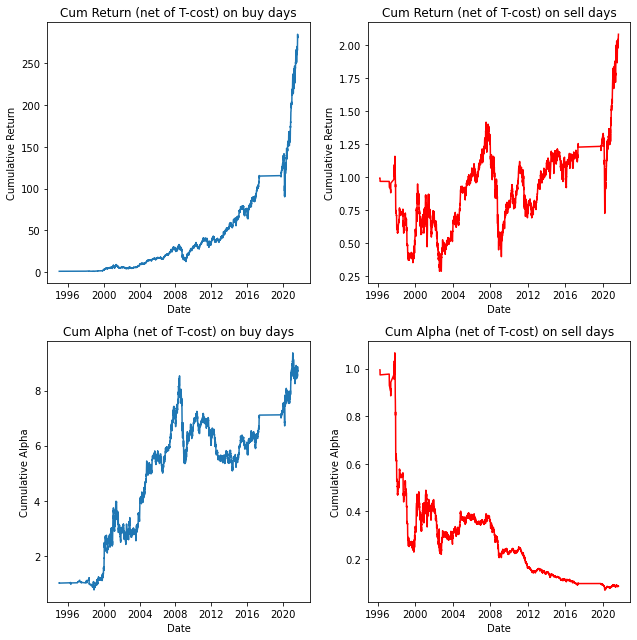

In [38]:
# 5 day holding period
cp.get_returns_turnover_Tcost_summary_plusPlots(data_smaller5)


There are  1  returns that dont match using .mean() vs. using equal weights

There are  0  alphas that dont match using .mean() vs. using equal weights

There are  2  returns that dont match using .mean() vs. using equal weights

There are  0  alphas that dont match using .mean() vs. using equal weights

All weights sum to one for Buys

All weights sum to one for Sells
Regression for Buy Portfolio
                            OLS Regression Results                            
Dep. Variable:           ew_return-RF   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     2.255
Date:                Sat, 04 Dec 2021   Prob (F-statistic):             0.0355
Time:                        20:40:13   Log-Likelihood:                 13271.
No. Observations:                5290   AIC:                        -2.653e+04
Df Residuals:                    5283   BIC: 

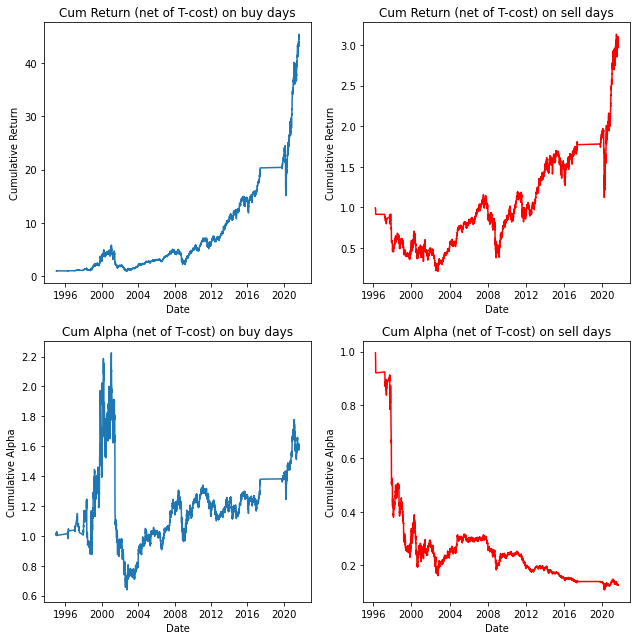

In [39]:
# 10 day holding period
cp.get_returns_turnover_Tcost_summary_plusPlots(data_smaller10)


There are  1  returns that dont match using .mean() vs. using equal weights

There are  0  alphas that dont match using .mean() vs. using equal weights

There are  2  returns that dont match using .mean() vs. using equal weights

There are  0  alphas that dont match using .mean() vs. using equal weights

All weights sum to one for Buys

All weights sum to one for Sells
Regression for Buy Portfolio
                            OLS Regression Results                            
Dep. Variable:           ew_return-RF   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     2.223
Date:                Sat, 04 Dec 2021   Prob (F-statistic):             0.0381
Time:                        20:40:32   Log-Likelihood:                 13661.
No. Observations:                5387   AIC:                        -2.731e+04
Df Residuals:                    5380   BIC: 

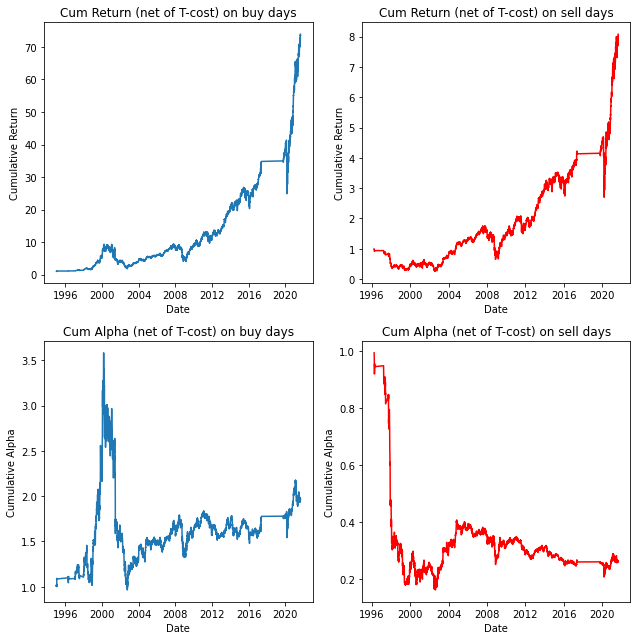

In [40]:
# 15 day holding period
cp.get_returns_turnover_Tcost_summary_plusPlots(data_smaller15)


There are  1  returns that dont match using .mean() vs. using equal weights

There are  0  alphas that dont match using .mean() vs. using equal weights

There are  4  returns that dont match using .mean() vs. using equal weights

There are  0  alphas that dont match using .mean() vs. using equal weights

All weights sum to one for Buys

All weights sum to one for Sells
Regression for Buy Portfolio
                            OLS Regression Results                            
Dep. Variable:           ew_return-RF   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     3.132
Date:                Sat, 04 Dec 2021   Prob (F-statistic):            0.00457
Time:                        20:41:03   Log-Likelihood:                 13964.
No. Observations:                5438   AIC:                        -2.791e+04
Df Residuals:                    5431   BIC: 

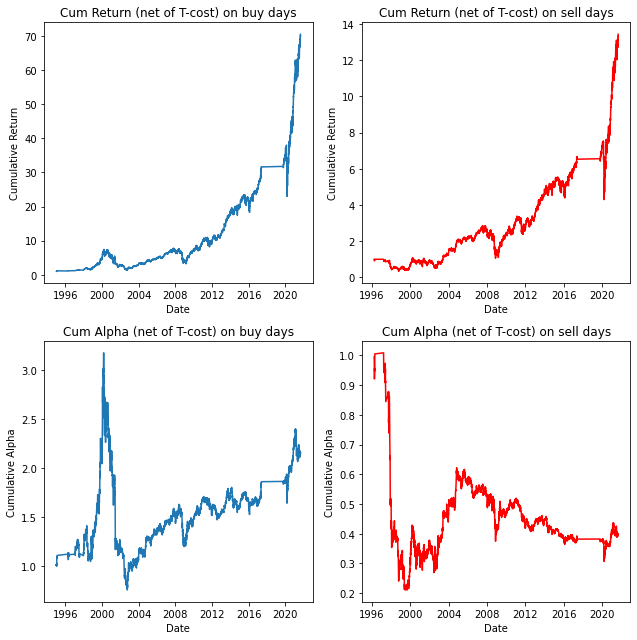

In [41]:
# 20 day holding period
cp.get_returns_turnover_Tcost_summary_plusPlots(data_smaller20)

# BREAK!
# BREAK!
# BREAK!

# Now let's trade on moves in cfpshigha1

In [42]:
#### Please run the line below once in order to get "data_with_rets.pkl" from "afp_data_sample_1995_onward_v2.csv"
#cp.get_data(flag=True)

data = pd.read_pickle('data_with_rets.pkl') #reload the data in order to start from scratch!!!

data = data.sort_values(['osid', 'tradedate']).reset_index(drop=True).copy()

data = data[data['cfpshigha3'].notna()].reset_index(drop=True).copy()

data['buy_tomorrow'] = np.where(data['cfpshigha3'].diff(1) > 0, 1, 0)
data['sell_tomorrow'] = np.where(data['cfpshigha3'].diff(1) < 0, 1, 0)


print('Total number of Buys: ',np.count_nonzero(data['buy_tomorrow']))
print('Total number of Sells: ',np.count_nonzero(data['sell_tomorrow']))

print('Unique buy_tomorrow values: ',np.unique(data['buy_tomorrow'])) #there are only 0 or 1 values in 'buy_tomorrow'
print('Unique sell_tomorrow values: ',np.unique(data['sell_tomorrow'])) #there are only 0 or 1 values in 'sell_tomorrow'



data = cp.trade_on_valid_lags_only(data)

data_smaller,data_smaller5,data_smaller10,data_smaller15,data_smaller20 = cp.pull_signal_forward(data)

data_smaller20 = cp.trade_on_valid_lags_only(data_smaller20)
data_smaller15 = cp.trade_on_valid_lags_only(data_smaller15)
data_smaller10 = cp.trade_on_valid_lags_only(data_smaller10)
data_smaller5 = cp.trade_on_valid_lags_only(data_smaller5)
data_smaller = cp.trade_on_valid_lags_only(data_smaller)

Total number of Buys:  11149
Total number of Sells:  11386
Unique buy_tomorrow values:  [0 1]
Unique sell_tomorrow values:  [0 1]

There are  136  problems for buying

There are  137  problems for selling
Total number of Buys:  11013
Total number of Sells:  11249

There are  299  problems for buying

There are  307  problems for selling
Total number of Buys:  110107
Total number of Sells:  91501

There are  253  problems for buying

There are  256  problems for selling
Total number of Buys:  88026
Total number of Sells:  73649

There are  199  problems for buying

There are  198  problems for selling
Total number of Buys:  64259
Total number of Sells:  54611

There are  119  problems for buying

There are  123  problems for selling
Total number of Buys:  38340
Total number of Sells:  33823

There are  1  problems for buying

There are  0  problems for selling
Total number of Buys:  11002
Total number of Sells:  11242



There are  1  returns that dont match using .mean() vs. using equal weights

There are  0  alphas that dont match using .mean() vs. using equal weights

There are  1  returns that dont match using .mean() vs. using equal weights

There are  0  alphas that dont match using .mean() vs. using equal weights

All weights sum to one for Buys

All weights sum to one for Sells
Regression for Buy Portfolio
                            OLS Regression Results                            
Dep. Variable:           ew_return-RF   R-squared:                       0.010
Model:                            OLS   Adj. R-squared:                  0.008
Method:                 Least Squares   F-statistic:                     4.982
Date:                Sat, 04 Dec 2021   Prob (F-statistic):           4.35e-05
Time:                        20:42:09   Log-Likelihood:                 6969.4
No. Observations:                3018   AIC:                        -1.392e+04
Df Residuals:                    3011   BIC: 

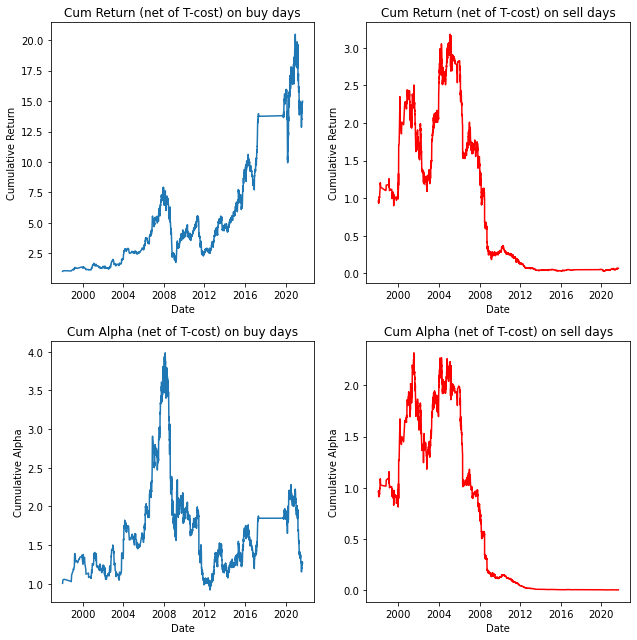

In [43]:
# 1 day holding period
cp.get_returns_turnover_Tcost_summary_plusPlots(data_smaller)


There are  1  returns that dont match using .mean() vs. using equal weights

There are  0  alphas that dont match using .mean() vs. using equal weights

There are  3  returns that dont match using .mean() vs. using equal weights

There are  0  alphas that dont match using .mean() vs. using equal weights

All weights sum to one for Buys

All weights sum to one for Sells
Regression for Buy Portfolio
                            OLS Regression Results                            
Dep. Variable:           ew_return-RF   R-squared:                       0.006
Model:                            OLS   Adj. R-squared:                  0.004
Method:                 Least Squares   F-statistic:                     4.151
Date:                Sat, 04 Dec 2021   Prob (F-statistic):           0.000364
Time:                        20:42:23   Log-Likelihood:                 10966.
No. Observations:                4415   AIC:                        -2.192e+04
Df Residuals:                    4408   BIC: 

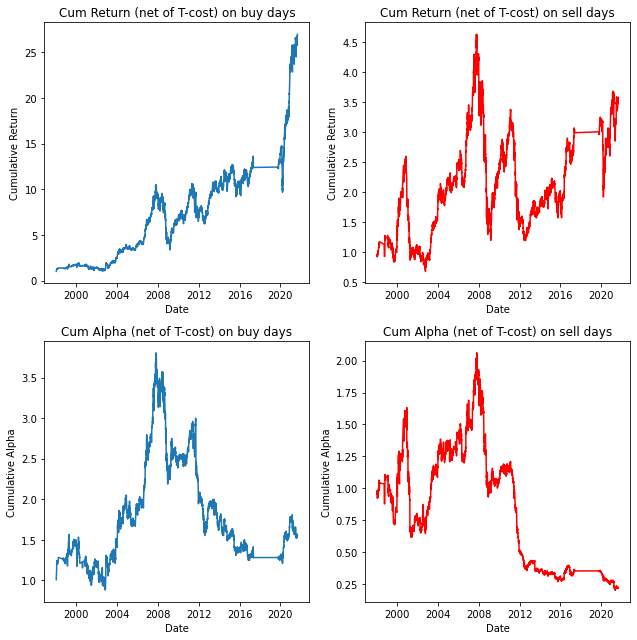

In [44]:
# 5 day holding period
cp.get_returns_turnover_Tcost_summary_plusPlots(data_smaller5)


There are  1  returns that dont match using .mean() vs. using equal weights

There are  0  alphas that dont match using .mean() vs. using equal weights

There are  1  returns that dont match using .mean() vs. using equal weights

There are  0  alphas that dont match using .mean() vs. using equal weights

All weights sum to one for Buys

All weights sum to one for Sells
Regression for Buy Portfolio
                            OLS Regression Results                            
Dep. Variable:           ew_return-RF   R-squared:                       0.004
Model:                            OLS   Adj. R-squared:                  0.003
Method:                 Least Squares   F-statistic:                     3.045
Date:                Sat, 04 Dec 2021   Prob (F-statistic):            0.00565
Time:                        20:42:38   Log-Likelihood:                 11982.
No. Observations:                4783   AIC:                        -2.395e+04
Df Residuals:                    4776   BIC: 

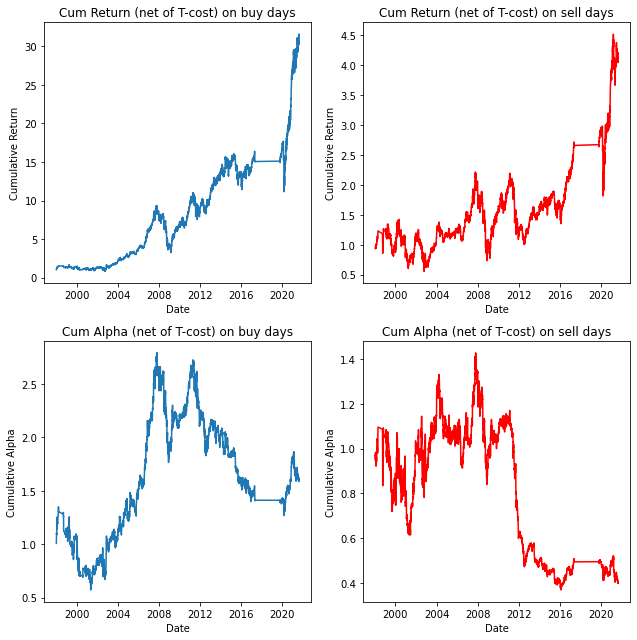

In [45]:
# 10 day holding period
cp.get_returns_turnover_Tcost_summary_plusPlots(data_smaller10)


There are  1  returns that dont match using .mean() vs. using equal weights

There are  0  alphas that dont match using .mean() vs. using equal weights

There are  1  returns that dont match using .mean() vs. using equal weights

There are  0  alphas that dont match using .mean() vs. using equal weights

All weights sum to one for Buys

All weights sum to one for Sells
Regression for Buy Portfolio
                            OLS Regression Results                            
Dep. Variable:           ew_return-RF   R-squared:                       0.004
Model:                            OLS   Adj. R-squared:                  0.003
Method:                 Least Squares   F-statistic:                     3.561
Date:                Sat, 04 Dec 2021   Prob (F-statistic):            0.00160
Time:                        20:42:53   Log-Likelihood:                 12461.
No. Observations:                4939   AIC:                        -2.491e+04
Df Residuals:                    4932   BIC: 

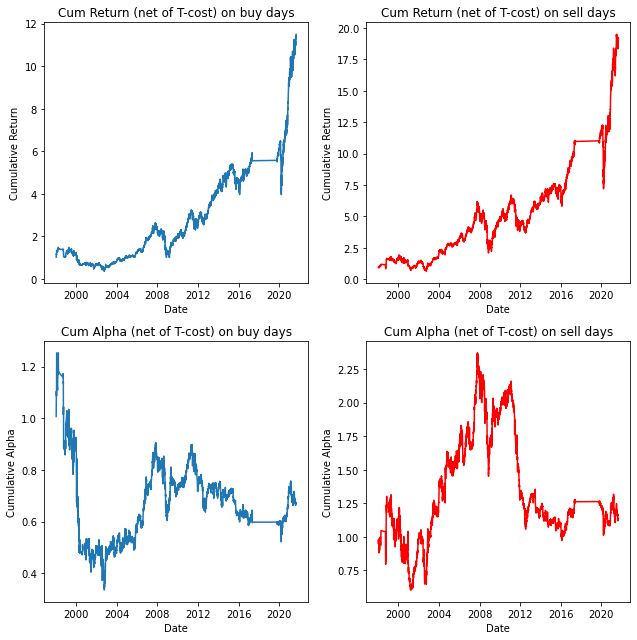

In [46]:
# 15 day holding period
cp.get_returns_turnover_Tcost_summary_plusPlots(data_smaller15)


There are  2  returns that dont match using .mean() vs. using equal weights

There are  0  alphas that dont match using .mean() vs. using equal weights

There are  2  returns that dont match using .mean() vs. using equal weights

There are  0  alphas that dont match using .mean() vs. using equal weights

All weights sum to one for Buys

All weights sum to one for Sells
Regression for Buy Portfolio
                            OLS Regression Results                            
Dep. Variable:           ew_return-RF   R-squared:                       0.004
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     2.952
Date:                Sat, 04 Dec 2021   Prob (F-statistic):            0.00706
Time:                        20:43:10   Log-Likelihood:                 12655.
No. Observations:                5025   AIC:                        -2.530e+04
Df Residuals:                    5018   BIC: 

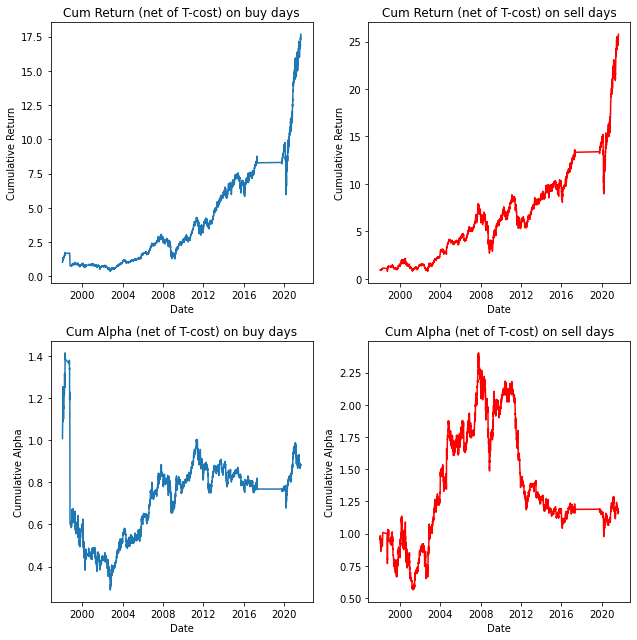

In [47]:
# 20 day holding period
cp.get_returns_turnover_Tcost_summary_plusPlots(data_smaller20)

# BREAK!
# BREAK!
# BREAK!

# Now let's trade on moves in cfpslowa1

In [48]:
#### Please run the line below once in order to get "data_with_rets.pkl" from "afp_data_sample_1995_onward_v2.csv"
#cp.get_data(flag=True)

data = pd.read_pickle('data_with_rets.pkl') #reload the data in order to start from scratch!!!

data = data.sort_values(['osid', 'tradedate']).reset_index(drop=True).copy()

data = data[data['cfpslowa3'].notna()].reset_index(drop=True).copy()

data['buy_tomorrow'] = np.where(data['cfpslowa3'].diff(1) > 0, 1, 0)
data['sell_tomorrow'] = np.where(data['cfpslowa3'].diff(1) < 0, 1, 0)


print('Total number of Buys: ',np.count_nonzero(data['buy_tomorrow']))
print('Total number of Sells: ',np.count_nonzero(data['sell_tomorrow']))

print('Unique buy_tomorrow values: ',np.unique(data['buy_tomorrow'])) #there are only 0 or 1 values in 'buy_tomorrow'
print('Unique sell_tomorrow values: ',np.unique(data['sell_tomorrow'])) #there are only 0 or 1 values in 'sell_tomorrow'



data = cp.trade_on_valid_lags_only(data)

data_smaller,data_smaller5,data_smaller10,data_smaller15,data_smaller20 = cp.pull_signal_forward(data)

data_smaller20 = cp.trade_on_valid_lags_only(data_smaller20)
data_smaller15 = cp.trade_on_valid_lags_only(data_smaller15)
data_smaller10 = cp.trade_on_valid_lags_only(data_smaller10)
data_smaller5 = cp.trade_on_valid_lags_only(data_smaller5)
data_smaller = cp.trade_on_valid_lags_only(data_smaller)

Total number of Buys:  10880
Total number of Sells:  11593
Unique buy_tomorrow values:  [0 1]
Unique sell_tomorrow values:  [0 1]

There are  123  problems for buying

There are  143  problems for selling
Total number of Buys:  10757
Total number of Sells:  11450

There are  266  problems for buying

There are  290  problems for selling
Total number of Buys:  107729
Total number of Sells:  94876

There are  220  problems for buying

There are  239  problems for selling
Total number of Buys:  85893
Total number of Sells:  76468

There are  164  problems for buying

There are  185  problems for selling
Total number of Buys:  62605
Total number of Sells:  56693

There are  101  problems for buying

There are  120  problems for selling
Total number of Buys:  37298
Total number of Sells:  34980

There are  1  problems for buying

There are  0  problems for selling
Total number of Buys:  10747
Total number of Sells:  11442



There are  1  returns that dont match using .mean() vs. using equal weights

There are  0  alphas that dont match using .mean() vs. using equal weights

There are  1  returns that dont match using .mean() vs. using equal weights

There are  0  alphas that dont match using .mean() vs. using equal weights

All weights sum to one for Buys

All weights sum to one for Sells
Regression for Buy Portfolio
                            OLS Regression Results                            
Dep. Variable:           ew_return-RF   R-squared:                       0.005
Model:                            OLS   Adj. R-squared:                  0.003
Method:                 Least Squares   F-statistic:                     2.568
Date:                Sat, 04 Dec 2021   Prob (F-statistic):             0.0175
Time:                        20:44:23   Log-Likelihood:                 7034.7
No. Observations:                3055   AIC:                        -1.406e+04
Df Residuals:                    3048   BIC: 

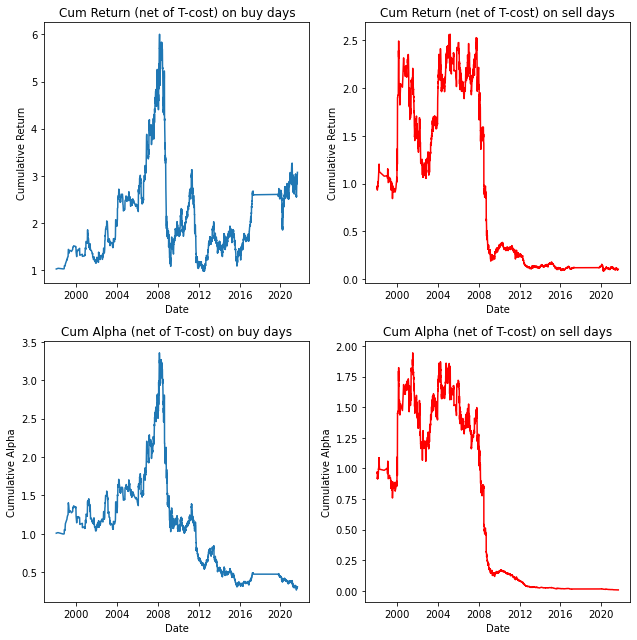

In [49]:
# 1 day holding period
cp.get_returns_turnover_Tcost_summary_plusPlots(data_smaller)


There are  1  returns that dont match using .mean() vs. using equal weights

There are  0  alphas that dont match using .mean() vs. using equal weights

There are  2  returns that dont match using .mean() vs. using equal weights

There are  0  alphas that dont match using .mean() vs. using equal weights

All weights sum to one for Buys

All weights sum to one for Sells
Regression for Buy Portfolio
                            OLS Regression Results                            
Dep. Variable:           ew_return-RF   R-squared:                       0.006
Model:                            OLS   Adj. R-squared:                  0.004
Method:                 Least Squares   F-statistic:                     4.320
Date:                Sat, 04 Dec 2021   Prob (F-statistic):           0.000237
Time:                        20:44:44   Log-Likelihood:                 10966.
No. Observations:                4424   AIC:                        -2.192e+04
Df Residuals:                    4417   BIC: 

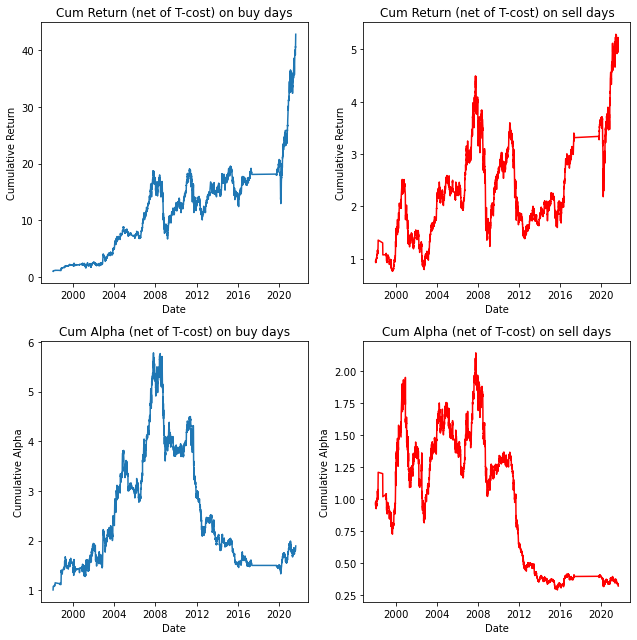

In [50]:
# 5 day holding period
cp.get_returns_turnover_Tcost_summary_plusPlots(data_smaller5)


There are  2  returns that dont match using .mean() vs. using equal weights

There are  0  alphas that dont match using .mean() vs. using equal weights

There are  1  returns that dont match using .mean() vs. using equal weights

There are  0  alphas that dont match using .mean() vs. using equal weights

All weights sum to one for Buys

All weights sum to one for Sells
Regression for Buy Portfolio
                            OLS Regression Results                            
Dep. Variable:           ew_return-RF   R-squared:                       0.004
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     2.805
Date:                Sat, 04 Dec 2021   Prob (F-statistic):             0.0100
Time:                        20:45:02   Log-Likelihood:                 12025.
No. Observations:                4782   AIC:                        -2.404e+04
Df Residuals:                    4775   BIC: 

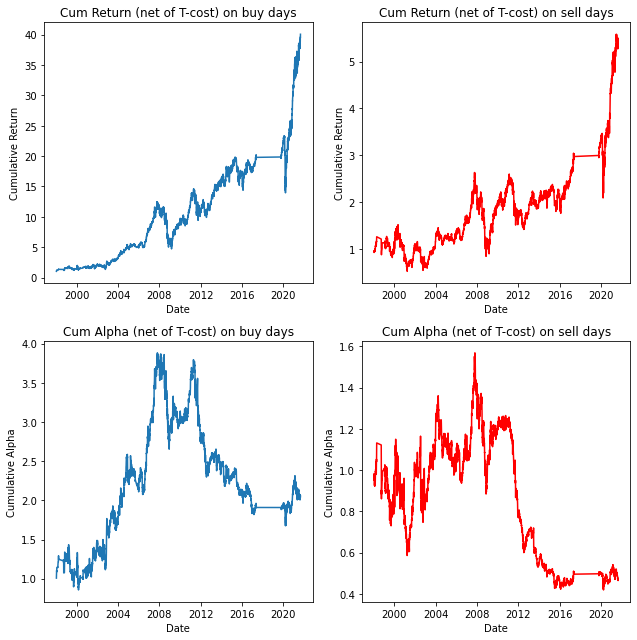

In [51]:
# 10 day holding period
cp.get_returns_turnover_Tcost_summary_plusPlots(data_smaller10)


There are  2  returns that dont match using .mean() vs. using equal weights

There are  0  alphas that dont match using .mean() vs. using equal weights

There are  1  returns that dont match using .mean() vs. using equal weights

There are  0  alphas that dont match using .mean() vs. using equal weights

All weights sum to one for Buys

All weights sum to one for Sells
Regression for Buy Portfolio
                            OLS Regression Results                            
Dep. Variable:           ew_return-RF   R-squared:                       0.005
Model:                            OLS   Adj. R-squared:                  0.004
Method:                 Least Squares   F-statistic:                     4.123
Date:                Sat, 04 Dec 2021   Prob (F-statistic):           0.000391
Time:                        20:45:18   Log-Likelihood:                 12555.
No. Observations:                4938   AIC:                        -2.510e+04
Df Residuals:                    4931   BIC: 

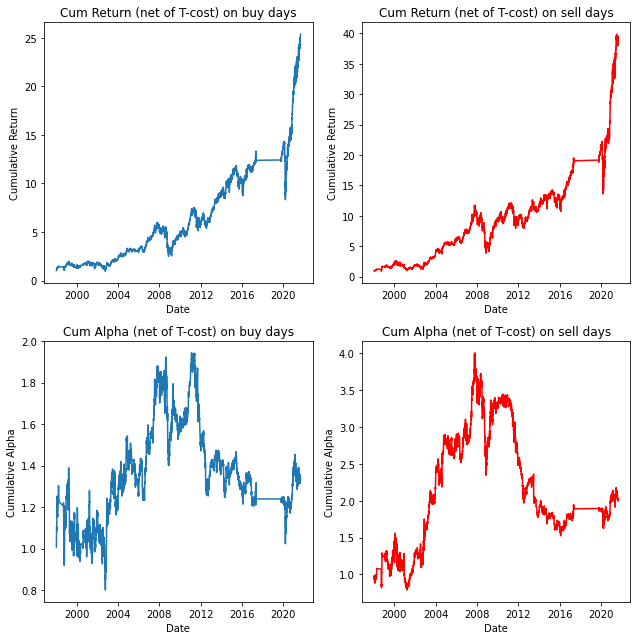

In [52]:
# 15 day holding period
cp.get_returns_turnover_Tcost_summary_plusPlots(data_smaller15)


There are  1  returns that dont match using .mean() vs. using equal weights

There are  0  alphas that dont match using .mean() vs. using equal weights

There are  0  returns that dont match using .mean() vs. using equal weights

There are  0  alphas that dont match using .mean() vs. using equal weights

All weights sum to one for Buys

All weights sum to one for Sells
Regression for Buy Portfolio
                            OLS Regression Results                            
Dep. Variable:           ew_return-RF   R-squared:                       0.005
Model:                            OLS   Adj. R-squared:                  0.004
Method:                 Least Squares   F-statistic:                     4.314
Date:                Sat, 04 Dec 2021   Prob (F-statistic):           0.000240
Time:                        20:45:33   Log-Likelihood:                 12748.
No. Observations:                5026   AIC:                        -2.548e+04
Df Residuals:                    5019   BIC: 

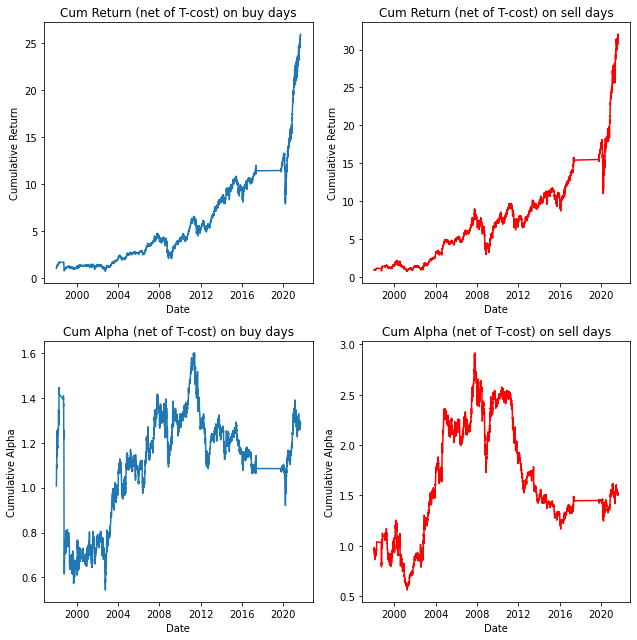

In [53]:
# 20 day holding period
cp.get_returns_turnover_Tcost_summary_plusPlots(data_smaller20)

# BREAK!
# BREAK!
# BREAK!

# Now let's trade on BOTH cfpshigha1 & cfpslowa1

In [54]:
#### Please run the line below once in order to get "data_with_rets.pkl" from "afp_data_sample_1995_onward_v2.csv"
#cp.get_data(flag=True)

data = pd.read_pickle('data_with_rets.pkl') #reload the data in order to start from scratch!!!

data = data.sort_values(['osid', 'tradedate']).reset_index(drop=True).copy()

data = data[data['cfpshigha3'].notna()].reset_index(drop=True).copy()
data = data[data['cfpslowa3'].notna()].reset_index(drop=True).copy()

data['midpoint_cfps_estimate'] = (data['cfpslowa3'] + data['cfpshigha3']) / 2

data = data[data['midpoint_cfps_estimate'].notna()].reset_index(drop=True).copy()

data['buy_tomorrow'] = np.where(data['midpoint_cfps_estimate'].diff(1) > 0, 1, 0)
data['sell_tomorrow'] = np.where(data['midpoint_cfps_estimate'].diff(1) < 0, 1, 0)


print('Total number of Buys: ',np.count_nonzero(data['buy_tomorrow']))
print('Total number of Sells: ',np.count_nonzero(data['sell_tomorrow']))

print('Unique buy_tomorrow values: ',np.unique(data['buy_tomorrow'])) #there are only 0 or 1 values in 'buy_tomorrow'
print('Unique sell_tomorrow values: ',np.unique(data['sell_tomorrow'])) #there are only 0 or 1 values in 'sell_tomorrow'



data = cp.trade_on_valid_lags_only(data)

data_smaller,data_smaller5,data_smaller10,data_smaller15,data_smaller20 = cp.pull_signal_forward(data)

data_smaller20 = cp.trade_on_valid_lags_only(data_smaller20)
data_smaller15 = cp.trade_on_valid_lags_only(data_smaller15)
data_smaller10 = cp.trade_on_valid_lags_only(data_smaller10)
data_smaller5 = cp.trade_on_valid_lags_only(data_smaller5)
data_smaller = cp.trade_on_valid_lags_only(data_smaller)

Total number of Buys:  12409
Total number of Sells:  12870
Unique buy_tomorrow values:  [0 1]
Unique sell_tomorrow values:  [0 1]

There are  140  problems for buying

There are  164  problems for selling
Total number of Buys:  12269
Total number of Sells:  12706

There are  367  problems for buying

There are  376  problems for selling
Total number of Buys:  124169
Total number of Sells:  108748

There are  309  problems for buying

There are  313  problems for selling
Total number of Buys:  99932
Total number of Sells:  88014

There are  239  problems for buying

There are  241  problems for selling
Total number of Buys:  73322
Total number of Sells:  65346

There are  135  problems for buying

There are  147  problems for selling
Total number of Buys:  43617
Total number of Sells:  39971

There are  1  problems for buying

There are  0  problems for selling
Total number of Buys:  12257
Total number of Sells:  12697



There are  1  returns that dont match using .mean() vs. using equal weights

There are  0  alphas that dont match using .mean() vs. using equal weights

There are  1  returns that dont match using .mean() vs. using equal weights

There are  0  alphas that dont match using .mean() vs. using equal weights

All weights sum to one for Buys

All weights sum to one for Sells
Regression for Buy Portfolio
                            OLS Regression Results                            
Dep. Variable:           ew_return-RF   R-squared:                       0.009
Model:                            OLS   Adj. R-squared:                  0.007
Method:                 Least Squares   F-statistic:                     4.781
Date:                Sat, 04 Dec 2021   Prob (F-statistic):           7.32e-05
Time:                        20:46:22   Log-Likelihood:                 7232.5
No. Observations:                3123   AIC:                        -1.445e+04
Df Residuals:                    3116   BIC: 

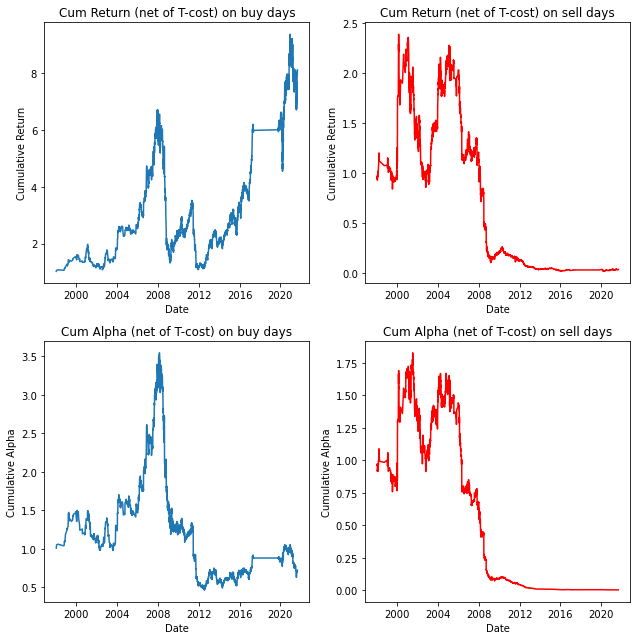

In [55]:
# 1 day holding period
cp.get_returns_turnover_Tcost_summary_plusPlots(data_smaller)


There are  1  returns that dont match using .mean() vs. using equal weights

There are  0  alphas that dont match using .mean() vs. using equal weights

There are  1  returns that dont match using .mean() vs. using equal weights

There are  0  alphas that dont match using .mean() vs. using equal weights

All weights sum to one for Buys

All weights sum to one for Sells
Regression for Buy Portfolio
                            OLS Regression Results                            
Dep. Variable:           ew_return-RF   R-squared:                       0.006
Model:                            OLS   Adj. R-squared:                  0.004
Method:                 Least Squares   F-statistic:                     4.261
Date:                Sat, 04 Dec 2021   Prob (F-statistic):           0.000275
Time:                        20:46:39   Log-Likelihood:                 11084.
No. Observations:                4469   AIC:                        -2.215e+04
Df Residuals:                    4462   BIC: 

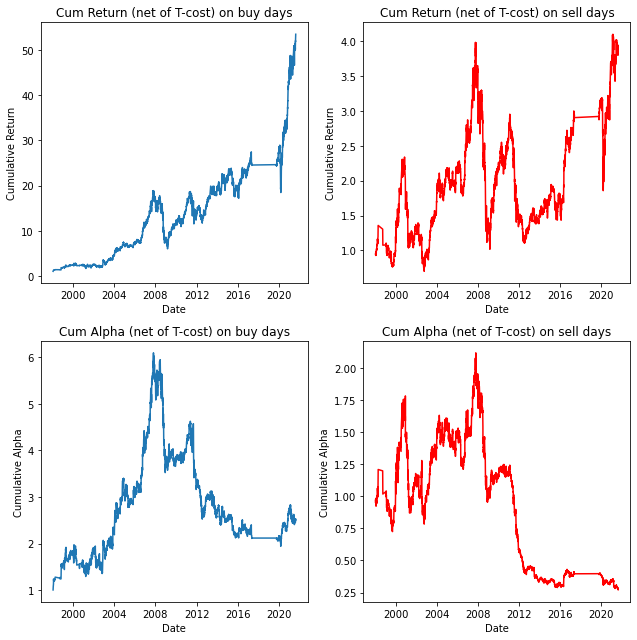

In [56]:
# 5 day holding period
cp.get_returns_turnover_Tcost_summary_plusPlots(data_smaller5)


There are  1  returns that dont match using .mean() vs. using equal weights

There are  0  alphas that dont match using .mean() vs. using equal weights

There are  1  returns that dont match using .mean() vs. using equal weights

There are  0  alphas that dont match using .mean() vs. using equal weights

All weights sum to one for Buys

All weights sum to one for Sells
Regression for Buy Portfolio
                            OLS Regression Results                            
Dep. Variable:           ew_return-RF   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     2.436
Date:                Sat, 04 Dec 2021   Prob (F-statistic):             0.0236
Time:                        20:46:53   Log-Likelihood:                 12106.
No. Observations:                4820   AIC:                        -2.420e+04
Df Residuals:                    4813   BIC: 

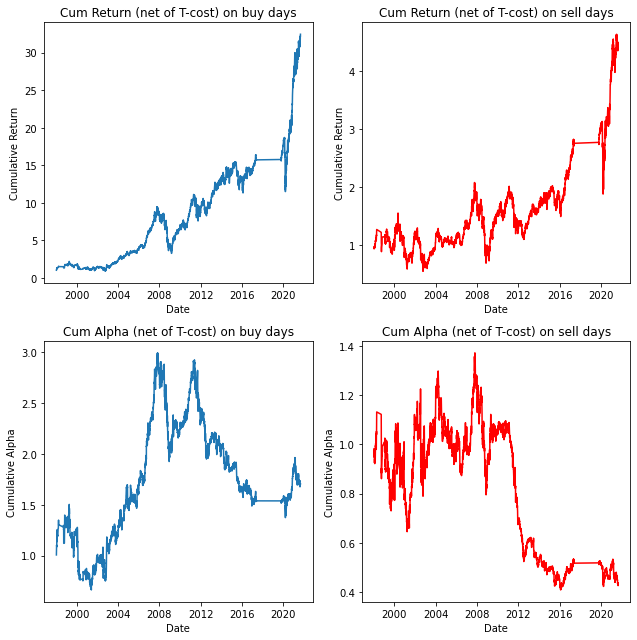

In [57]:
# 10 day holding period
cp.get_returns_turnover_Tcost_summary_plusPlots(data_smaller10)


There are  0  returns that dont match using .mean() vs. using equal weights

There are  0  alphas that dont match using .mean() vs. using equal weights

There are  2  returns that dont match using .mean() vs. using equal weights

There are  0  alphas that dont match using .mean() vs. using equal weights

All weights sum to one for Buys

All weights sum to one for Sells
Regression for Buy Portfolio
                            OLS Regression Results                            
Dep. Variable:           ew_return-RF   R-squared:                       0.005
Model:                            OLS   Adj. R-squared:                  0.003
Method:                 Least Squares   F-statistic:                     3.785
Date:                Sat, 04 Dec 2021   Prob (F-statistic):           0.000915
Time:                        20:47:08   Log-Likelihood:                 12594.
No. Observations:                4975   AIC:                        -2.517e+04
Df Residuals:                    4968   BIC: 

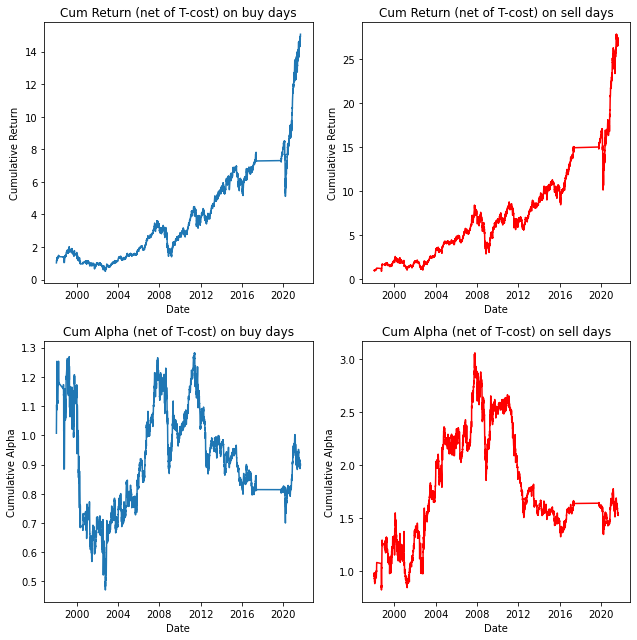

In [58]:
# 15 day holding period
cp.get_returns_turnover_Tcost_summary_plusPlots(data_smaller15)


There are  2  returns that dont match using .mean() vs. using equal weights

There are  0  alphas that dont match using .mean() vs. using equal weights

There are  1  returns that dont match using .mean() vs. using equal weights

There are  0  alphas that dont match using .mean() vs. using equal weights

All weights sum to one for Buys

All weights sum to one for Sells
Regression for Buy Portfolio
                            OLS Regression Results                            
Dep. Variable:           ew_return-RF   R-squared:                       0.004
Model:                            OLS   Adj. R-squared:                  0.003
Method:                 Least Squares   F-statistic:                     3.329
Date:                Sat, 04 Dec 2021   Prob (F-statistic):            0.00284
Time:                        20:47:25   Log-Likelihood:                 12777.
No. Observations:                5063   AIC:                        -2.554e+04
Df Residuals:                    5056   BIC: 

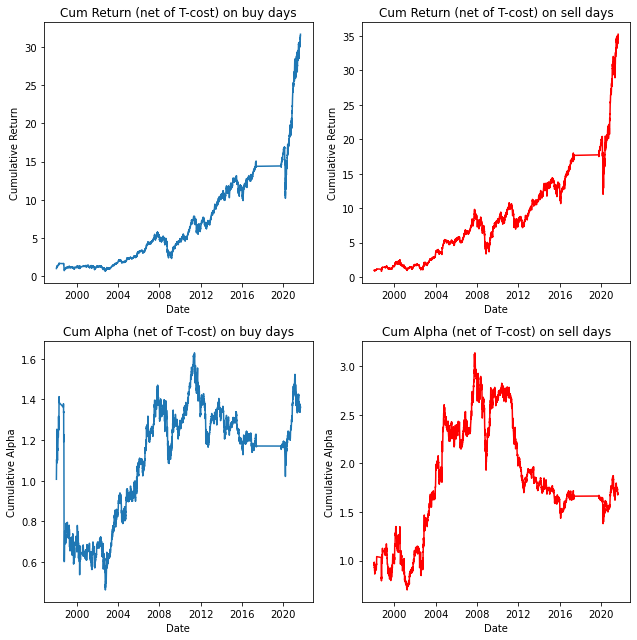

In [59]:
# 20 day holding period
cp.get_returns_turnover_Tcost_summary_plusPlots(data_smaller20)